<a href="https://colab.research.google.com/github/RoshanJamthe/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type (whether movie or tv show) is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



text based features : 

type, director, cast, country, release_year, rating, listed_in, description

countvectorizer :

director, cast, country, listed_in

tfidfvectorizer : 

description

Clustering:

Insight from type, country, rating and genre: what content is popular in which country

Insight from description alone - similar content based on the plot

Insight from description and type (tv shows and movies) - similar content based on the plot and the type

Insight from actors, genres and description - similar content based on actors and genres

Insight from release year and genre - which content is popular in particular year

which directors are making particular kind of content

Recommendation system:
Using knn

using cosine similarity

## **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# <b><u>Load all the Libraries</b></u>

In [1]:
"""Getting all the libraries required to run the codes in this notebook"""

############################################################
###         Importing Data Wrangling libraries          ###
############################################################
import numpy as np   
import pandas as pd # main library for data analysis
import matplotlib.pyplot as plt # main library for data visualizations
import matplotlib.cm as cm
# To output the plot inline with the code
%matplotlib inline 
import seaborn as sns
sns.set()         # Alias for set_theme(), which is the preferred interface for seaborn plots
from numpy import math

# To ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Gets the name of the variable as string
!pip install varname
from varname import nameof

# Import wordcloud
from wordcloud import WordCloud

##############################################################
###         Importing Data preprocessing Libraries         ###
##############################################################
# Using nltk library (arguably best for stopwords and punctuations)
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords

# Import lemmatizers
nltk.download('wordnet')  # Have to download the wordnet module
from nltk.stem import WordNetLemmatizer # import wordnetlemmatizer
import spacy # So we can use spacy's lemmatizer

# 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler # Normalizer
from sklearn.preprocessing import StandardScaler # Stardardizer

# Split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

##############################################################
###  Machine Learning Algorithms - CLUSTERING ANALYSIS     ###
##############################################################
# For clustering
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans  #  k-means clustering algorithm
from sklearn.cluster import MiniBatchKMeans # MiniBatchKMeans clustering algorithm for faster results

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering # Hierarchical clustering

from sklearn.cluster import AffinityPropagation

##############################################################
###     Performance metrics for clustering problem     ###
##############################################################
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_samples, silhouette_score # for scoring on basis of silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

#############################################################
###                 Model Interpretation                  ###
#############################################################
# To plot the clusters use the PCA and TSNE modules, import them first!
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

from scipy.cluster.hierarchy import dendrogram, linkage # Import the linkage and dendogram modules for hierarchical clustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


#<b><u>Dataset Loading and viewing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Dataset loading
netflix_data = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone project/Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
# View the data
netflix_data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [5]:
# Get feature info
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


##Handling missing values

In [6]:
#check the missing values in each feature
netflix_data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

There are null values in director, cast, country, rating features.

Director feature has most null values.

let's fix the director, cast, and country columns by adding prefix 'No' to the column name in place of missing value.
Then we will drop all the nan rows so we will be missing only 17 rows at max.


In [7]:
# Let's create a copy of the data before messing with a it a little 
df = netflix_data.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
# Get rid of untreated index
df = df.reset_index(drop=True)

In [10]:
# Impute 'no_director' in place of missing values in the director column
df['director'] = df['director'].fillna('no_director')

# Impute 'no_cast' in place of missing values in the cast column
df['cast'] = df['cast'].fillna('no_cast')

# Impute 'no_country' in place of missing values in the cast column
df['country'] = df['country'].fillna('no_country')

In [11]:
# Drop the missing rows
df = df.dropna()

## Clean the dataset

In [12]:
df.tail() # Get the last 5 rows of the dataset

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan  no_director   
7785   s7786  TV Show                    Zumbo's Just Desserts  no_director   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                            no_cast   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                         no_country  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

In [13]:
df['listed_in'].unique()

array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas', 'International TV Shows, TV Dramas, TV Mysteries',
       'Horror Movies, International Movies, Thrillers',
       'Dramas, Thrillers',
       'Crime TV Shows, International TV Shows, TV Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Documentaries, International Movies, Sports Movies',
       'Independent Movies, Sci-Fi & Fantasy, Thrillers',
       'Dramas, International Movies, Thrillers',
       'International TV Shows, TV Dramas',
       'Comedies, Dramas, Independent Movies', 'Sports Movies',
       'Dramas, Independent Movies, International Movies',
       'Action & Adventure, Dramas, International Movies',
       'Anime Series, International TV Shows', 'Documentaries',
       'Reality TV', 'Documentaries, International

 The dataset is okay for the Exploratory data analysis but not for the clustering, since we want to include columns such as director, cast, country, etc we should clean it better, I will show you how

In [14]:
# change 'TV Show' to 'TV_Show' for convience
df['type'] = df['type'].replace({'TV Show':'TV_Show'}) # Clean the type feature ( convert the TV Show to TV_Show, i.e. without space, this way it is good for handling the words)

In [15]:
def break_commas(row):
  """This function joins the names of country, cast, directors and genres by the '_',
  when the stop words and punctuations will be removed, the words will be treated as a single word
  Hence there will be no hindrance while applying countvectorizer or tfidvectorizer,
  otherwise the spaces between the words will treat them as separate entities and we will have extra features"""
  temp_list = [] # Get empty list

  # If no_ is not in the row string
  if 'no_' not in row:
    # Split the string using ',' to get a list of items
    list_of_items = row.split(',')
    
    # Iterate through the list_of_items
    for item in list_of_items:   
      item = item.strip() # Clean the 
      space_break = item.split(" ") # break the item using split(" ")
      temp_list.append('_'.join(space_break)) # join the item with the underscore

    return   ", ".join(temp_list) # join the items in the temp_list with ', ' and return 
  
  # Else just return the row
  else: 
    return row

In [16]:
# Apply the break_commas function to director, cast, country, listed_in

df['director'] = df['director'].apply(break_commas)

df['cast'] = df['cast'].apply(break_commas)

df['country'] = df['country'].apply(break_commas)

df['listed_in'] = df['listed_in'].apply(break_commas)

# View the change
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef_Fares   
7783   s7784    Movie                                   Zubaan  Mozez_Singh   
7784   s7785    Movie                        Zulu Man in Japan  no_director   
7785   s7786  TV_Show                    Zumbo's Just Desserts  no_director   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam_Dunn   

                                                   cast  \
7782  Imad_Creidi, Antoinette_Turk, Elias_Gergi, Car...   
7783  Vicky_Kaushal, Sarah-Jane_Dias, Raaghav_Chanan...   
7784                                            Nasty_C   
7785                         Adriano_Zumbo, Rachel_Khoo   
7786                                            no_cast   

                                                country          date_added  \
7782  Sweden, Czech_Republic, United_Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                         no_country  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United_Kingdom, Canada, United_States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International_Movies   
7783     Dramas, International_Movies, Music_&_Musicals   
7784  Documentaries, International_Movies, Music_&_M...   
7785                 International_TV_Shows, Reality_TV   
7786                    Documentaries, Music_&_Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

In [17]:
def lead_country(row):
  """Function returns the first country name from the list of country"""
  temp_list = [] # Get empty list

  # If no_ is not in the row string
  if 'no_' not in row:
    # Split the string using ',' to get a list of items
    list_of_items = row.split(',')
    
    # First item in list_of_items 
    item = list_of_items[0].strip() # Clean the item
    space_break = item.split(" ") # break the item using split(" ")
    return '_'.join(space_break) # join the item with the underscore

  # Else just return the row
  else: 
    return row

# Make a lead_country column in df
df['lead_country'] = df['country'].apply(lead_country)

In [18]:
# Check out last 5 rows from the df 
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef_Fares   
7783   s7784    Movie                                   Zubaan  Mozez_Singh   
7784   s7785    Movie                        Zulu Man in Japan  no_director   
7785   s7786  TV_Show                    Zumbo's Just Desserts  no_director   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam_Dunn   

                                                   cast  \
7782  Imad_Creidi, Antoinette_Turk, Elias_Gergi, Car...   
7783  Vicky_Kaushal, Sarah-Jane_Dias, Raaghav_Chanan...   
7784                                            Nasty_C   
7785                         Adriano_Zumbo, Rachel_Khoo   
7786                                            no_cast   

                                                country          date_added  \
7782  Sweden, Czech_Republic, United_Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                         no_country  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United_Kingdom, Canada, United_States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International_Movies   
7783     Dramas, International_Movies, Music_&_Musicals   
7784  Documentaries, International_Movies, Music_&_M...   
7785                 International_TV_Shows, Reality_TV   
7786                    Documentaries, Music_&_Musicals   

                                            description    lead_country  
7782  When Lebanon's Civil War deprives Zozo of his ...          Sweden  
7783  A scrappy but poor boy worms his way into a ty...           India  
7784  In this documentary, South African rapper Nast...      no_country  
7785  Dessert wizard Adriano Zumbo looks for the nex...       Australia  
7786  This documentary delves into the mystique behi...  United_Kingdom

In [19]:
df.duplicated().sum()  # Check for duplicates

0

In [20]:
# Check out unique values in each columns
for col in df.columns:
  print(f'{col} has {df[col].nunique()} unique values : /n{df[col].unique()}')
  print('**'*40)

show_id has 7770 unique values : /n['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
********************************************************************************
type has 2 unique values : /n['TV_Show' 'Movie']
********************************************************************************
title has 7770 unique values : /n['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
********************************************************************************
director has 4048 unique values : /n['no_director' 'Jorge_Michel_Grau' 'Gilbert_Chan' ... 'Josef_Fares'
 'Mozez_Singh' 'Sam_Dunn']
********************************************************************************
cast has 6818 unique values : /n['João_Miguel, Bianca_Comparato, Michel_Gomes, Rodolfo_Valente, Vaneza_Oliveira, Rafael_Lozano, Viviane_Porto, Mel_Fronckowiak, Sergio_Mamberti, Zezé_Motta, Celso_Frateschi'
 'Demián_Bichir, Héctor_Bonilla, Oscar_Serrano, Azalia_Ortiz, Oc

Okay, data is much cleaner now.



Still, data needs to be retrieved carefully from director, cast, country listed_in columns.

# <b><u> Exploratory Data Analysis

### Out of Movies and Tv shows, Which are more in number?

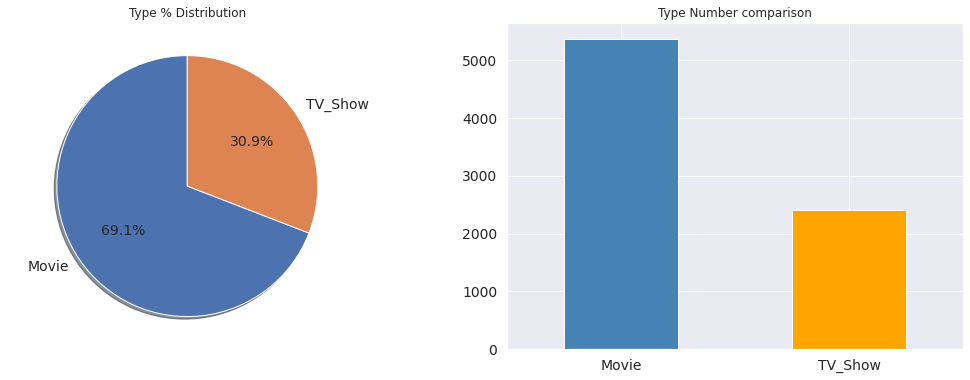

In [22]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
df['type'].value_counts().plot(kind='pie',fontsize=14, autopct='%1.1f%%',shadow=True, startangle=90,label= " ",title='Type % Distribution') # Get the pie plot of content distribution

plt.subplot(1,2,2)
df['type'].value_counts().plot(kind='bar',title='Type Number comparison',fontsize=14,grid=True,color=['steelblue','orange']) # Get the bar plot to compare the numbers
plt.xticks(rotation=0)
plt.show()

#### <u>Inference:</u> Movies on Netflix are more than twice in number than TV shows. And TV Shows have long way to go to catch upto that number

### Trend of number of movies/tv shows after 2010

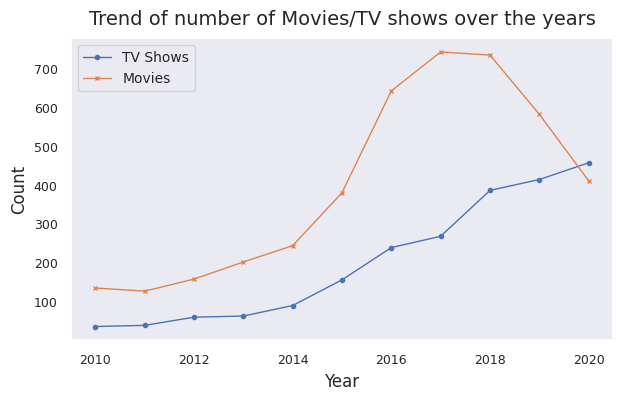

In [23]:
# Ignoring the year 2021 for the plot
fig, ax = plt.subplots(figsize=(7, 4), dpi=100) # Using suplots to get both lineplots in same figure
ax.plot(df[(df['type']=='TV_Show') & (df['release_year']>=2010)][['release_year','type']].groupby('release_year').count()[:-1], marker='o',markersize=3,linewidth=1,label='TV Shows') # Trend of tv shows
ax.plot(df[(df['type']=='Movie')& (df['release_year']>=2010)][['release_year','type']].groupby('release_year').count()[:-1], marker='x',markersize=3,linewidth=1,label='Movies') # Trend of movies

ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Count',fontsize=12)

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax.grid(None)
ax.set_title('Trend of number of Movies/TV shows over the years',fontsize=14,pad=10)
ax.legend(fontsize=10)
plt.show()

#### <u>Inference:</u> It is clear from the plot that from past five years, the focus from the Movies has been shifted towards TV shows. Number of movies featured were reduced from ~740 in 2017 to ~410 in 2020 while number of TV Shows increased continuously from ~270 in 2017 to ~460 in 2020.

From past five years, Netflix has shifted its focus towards TV shows. Number of movies added to Netflix reduced by 45% while number of TV Shows added increased by 70%.

### Top 20 countries based on content count

In [24]:
country_data = [] # Get all the occurences of countries in country feature in this list

# Iterate through the list of country feature
for string in df[df['country']!='no_country']['country'].tolist():

  # Split the string using ',' to get a list of countries where the content was shoot 
  temp = string.split(',')
  
  # Iterate through that list of countries
  for country in temp:
    # Apeend the country
    country_data.append(country.strip())

In [25]:
country_df = pd.Series(country_data) # Create a series using country_data list
country_df.value_counts()

United_States     3288
India              990
United_Kingdom     722
Canada             412
France             349
                  ... 
Samoa                1
Azerbaijan           1
Bermuda              1
Ecuador              1
Montenegro           1
Length: 118, dtype: int64

In [26]:
top_20_countries = country_df.value_counts()[:20] # Get top 20 countries

In [219]:
(7115)/7787

0.9137023243867985

In [220]:
top_20_countries.index[:12]

Index(['United_States', 'India', 'United_Kingdom', 'Canada', 'France', 'Japan',
       'Spain', 'South_Korea', 'Germany', 'Mexico', 'China', 'Australia'],
      dtype='object')

In [218]:
sum(top_20_countries[:12])

7115

Text(0.5, 1.0, 'Top 20 countries based on content')

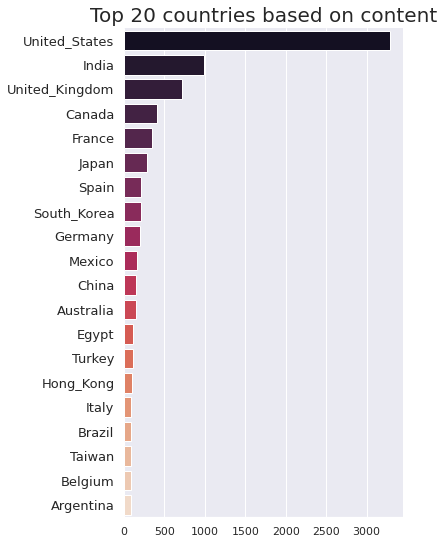

In [27]:
plt.figure(figsize=(5,9))
ax = sns.barplot(y=top_20_countries.index, x=top_20_countries,palette='rocket',orient='h')
plt.yticks(fontsize=13)
sns.despine(top=True,left=True)
plt.title('Top 20 countries based on content',fontsize=20)

#### <u>Inference:</u> United States contributes most content to Netflix, second is India followed by United Kingdom in 3rd position. The countries shown in the plot from India to Mexico are the future market of Netflix.

Netflix has a little over 90% of its Content from 12 ountries namely, 'United_States', 'India', 'United_Kingdom', 'Canada', 'France', 'Japan', 'Spain', 'South_Korea', 'Germany', 'Mexico', 'China' and 'Australia'. 

### Type - Country relationship, Understanding what type (whether movie or tv show) is available in different countries 

In [28]:
country_data = [] # Get all the occurences of countries in country feature in this list

# Iterate through the list of country feature
for string in df[df['country']!='no_country']['country'].tolist():

  # Split the string using ',' to get a list of countries where the content was shoot 
  temp = string.split(',')
  # Apeend the first country's name
  country_data.append(temp[0].strip())

In [29]:
# Get a copy of df
country_df = df[df['country']!='no_country'].copy()

# Create a main_country column
country_df['main_country'] = country_data

In [30]:
# Select main_country, type and any other non-null feature(we will take count of this feature)
country_type = country_df[['show_id','type','main_country']].groupby(['main_country','type']).count().reset_index() # Groupby on main_country and type

# Check out country_type dataframe
country_type.head()

main_country     type  show_id
0    Argentina    Movie       50
1    Argentina  TV_Show       18
2    Australia    Movie       56
3    Australia  TV_Show       50
4      Austria    Movie        7

In [31]:
# Use pivot function, to create a table of index = country, columns = type, values = show_id(count)
country_type_pivoted = country_type.pivot('main_country', 'type', 'show_id').fillna(0).sort_values(['Movie','TV_Show'],ascending=False).reset_index()

# Check out country_type_pivoted dataframe
country_type_pivoted

type    main_country   Movie  TV_Show
0      United_States  2097.0    777.0
1              India   883.0     73.0
2     United_Kingdom   341.0    235.0
3             Canada   175.0     84.0
4             France   137.0     59.0
..               ...     ...      ...
76            Cyprus     0.0      1.0
77            Jordan     0.0      1.0
78         Mauritius     0.0      1.0
79       Puerto_Rico     0.0      1.0
80           Senegal     0.0      1.0

[81 rows x 3 columns]

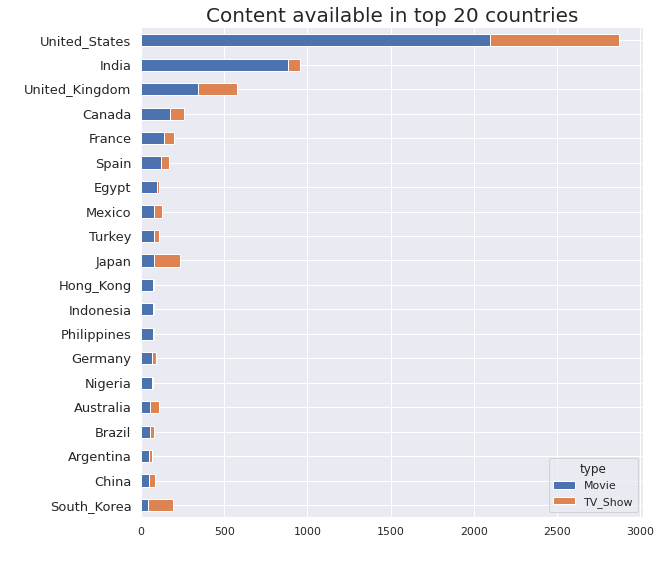

In [32]:
# Plot the content available in top 20 countries using country_type_pivoted dataframe
country_type_pivoted[:20][::-1].set_index('main_country').plot(kind='barh', stacked=True, figsize=(9,9))
plt.xlabel(" ")
plt.ylabel(" ")
plt.yticks(fontsize=13)
sns.despine(top=True,left=True)
plt.title("Content available in top 20 countries", fontsize=20)
plt.show()

#### <u>Inference</u>: Netflix is dominated by the United States movies and tv shows, they are also leading in actual number of content produced. 

Countries like Japan, South Korea has more focus on TV Shows than on Movies. 

India has remarkably low popular TV Shows content when compared with the popular movies the country had made till now. 

### Content addition trend of India and South Korea 

In [33]:
India_df = country_df[(country_df['main_country']=='India')]  # Get data for only India country
southkorea_df = country_df[(country_df['main_country']=='South_Korea')]  # Get data for only South Korea country

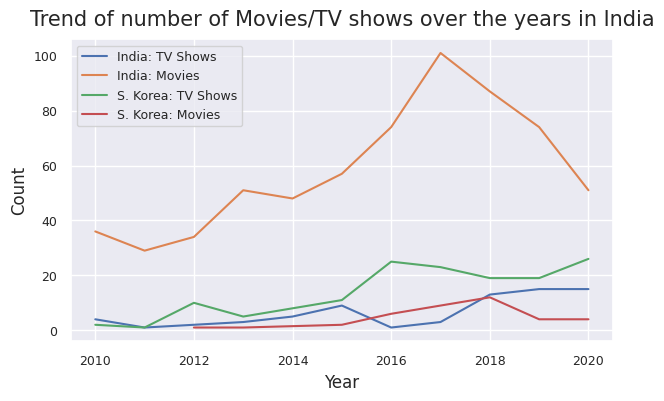

In [34]:
# Ignoring the year 2021 for the plot
fig, ax = plt.subplots(figsize=(7, 4), dpi=100) # Using suplots to get both lineplots in same figure
ax.plot(India_df[(India_df['type']=='TV_Show') & (India_df['release_year']>=2010)][['release_year','type']].groupby('release_year').count()[:-1],label='India: TV Shows') # Trend of tv shows : India
ax.plot(India_df[(India_df['type']=='Movie')& (India_df['release_year']>=2010)][['release_year','type']].groupby('release_year').count(), label='India: Movies') # Trend of movies : India

ax.plot(southkorea_df[(southkorea_df['type']=='TV_Show') & (southkorea_df['release_year']>=2010)][['release_year','type']].groupby('release_year').count(),label='S. Korea: TV Shows') # Trend of tv shows : S. Korea
ax.plot(southkorea_df[(southkorea_df['type']=='Movie')& (southkorea_df['release_year']>=2010)][['release_year','type']].groupby('release_year').count()[:-1], label='S. Korea: Movies') # Trend of movies : S. Korea
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Count',fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax.set_title('Trend of number of Movies/TV shows over the years in India',fontsize=15,pad=10)
ax.legend(fontsize=9)
plt.show()

#### <u>Inference</u> : In Past 5 years, more of Indian TV Shows content is getting featured on Netflix and the number is only increasing. But the number of Movies added per year is decreasing. There is a vast difference in number of movies these countries release per year. South Korea is releasing ~20 tv shows per year from last 5 years.

South Korean TV Shows are more popular than Indian TV Shows while Indian Movies are more popular.

### Top 20 Most active Directors

In [35]:
director_data = [] # Get all the occurences of directors in cast feature in this list

# Iterate through the list of director feature
for string in df[df['director']!='no_director']['director'].tolist():

  # Split the string using ',' to get a list of directors 
  temp = string.split(',')
  
  # Iterate through that list of directors
  for director in temp:
    # Apeend the directors 
    director_data.append(director.strip())

In [36]:
director_df = pd.Series(director_data) # Create a series using director_data list

In [37]:
director_df.value_counts() # Get the value_counts of directors

Jan_Suter              21
Raúl_Campos            19
Marcus_Raboy           16
Jay_Karas              15
Cathy_Garcia-Molina    13
                       ..
Sajid_Khan              1
Lucy_van_Beek           1
Remi_Weekes             1
Jennifer_Lynch          1
Mozez_Singh             1
Length: 4476, dtype: int64

In [38]:
top_20_directors = director_df.value_counts()[:20] # Get top 20 directors

Text(0.5, 1.0, 'Top 20 directors based on content')

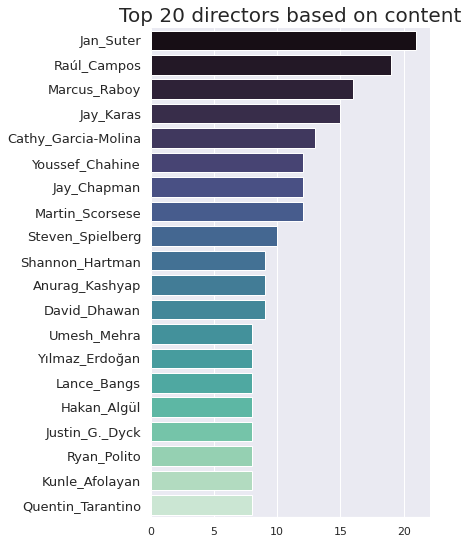

In [39]:
plt.figure(figsize=(5,9))
ax = sns.barplot(y=top_20_directors.index, x=top_20_directors,palette="mako",orient='h')
plt.yticks(fontsize=13)
sns.despine(top=True,left=True)
plt.title('Top 20 directors based on content',fontsize=20)

#### <u>Inference:</u>Jan Suter is the most featured director. Raul Campos and Jan Suter together directed 18 movies. We can observe some other great names such as Jay Chapman, Martin Scorsese and Steven Spielberg.

### Top 20 Most active actors

In [40]:
actor_data = [] # Get all the occurences of actors in cast feature in this list

# Iterate through the list of actor feature
for string in df[df['cast']!='no_cast']['cast'].tolist():

  # Split the string using ',' to get a list of actors 
  temp = string.split(',')
  
  # Iterate through that list of actors
  for actor in temp:
    # Append the actor
    actor_data.append(actor.strip())

In [41]:
actor_df = pd.Series(actor_data) # Create a series using actor_data list

In [42]:
actor_df.value_counts() # Get the value_counts of actors

Anupam_Kher         42
Shah_Rukh_Khan      35
Naseeruddin_Shah    30
Om_Puri             30
Takahiro_Sakurai    29
                    ..
Mylene_Dizon         1
Lorenz_Martinez      1
Art_Acuña            1
Archie_Alemania      1
Rachel_Khoo          1
Length: 32836, dtype: int64

In [43]:
top_20_actors = actor_df.value_counts()[:20] # Get top 20 directors

Text(0.5, 1.0, 'Top 20 actors based on content')

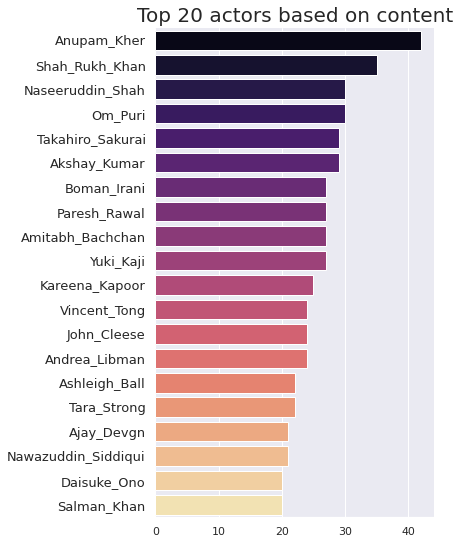

In [44]:
plt.figure(figsize=(5,9))
ax = sns.barplot(y=top_20_actors.index, x=top_20_actors,palette='magma',orient='h')
plt.yticks(fontsize=13)
sns.despine(top=True,left=True)
plt.title('Top 20 actors based on content',fontsize=20)

#### <u>Inference</u>: Most featured actor is Anupam Kher featured in 42 movies. Out of top 10 actors, 8 are Indians. It shows the impact of Indian actors on the World television industry. Some great names like Amitabh Bachchan, Shahrukh Khan, Akshay Kumar and Paresh Rawal is also in top 10 active actors.

### Get top 20 listed in category 

In [45]:
genre_data = [] # Get all the occurences of genres in listed_in feature in this list

# Iterate through the list of genre feature
for string in df['listed_in'].tolist():
  # Split the string using ',' to get a list of genres
  temp = string.split(',')
  # Iterate through that list of genres
  for genre in temp:
    # Append the genre
    genre_data.append(genre.strip()) # stripping the genre of the leading whitespaces

In [46]:
genre_df = pd.Series(genre_data) # Create a series using actor_data list

In [47]:
len(genre_df.value_counts())

42

In [48]:
genre_df.value_counts()[:5] # get top 15 genres

International_Movies      2437
Dramas                    2105
Comedies                  1471
International_TV_Shows    1197
Documentaries              786
dtype: int64

In [49]:
top_20_genres = genre_df.value_counts()[:20] # Get top 20 directors

Text(0.5, 1.0, 'Top 20 genres based on content')

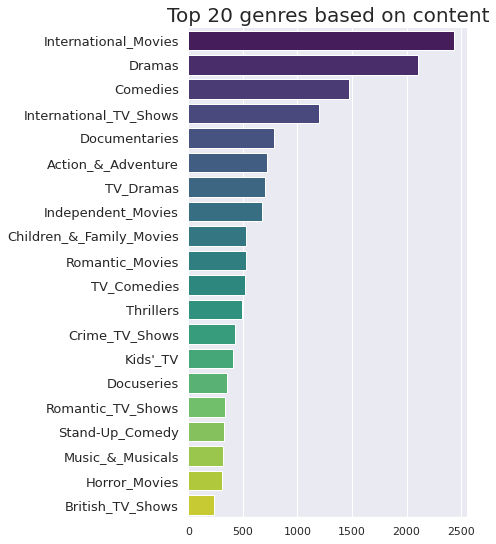

In [50]:
plt.figure(figsize=(5,9))
ax = sns.barplot(y=top_20_genres.index, x=top_20_genres,palette='viridis',orient='h')
plt.yticks(fontsize=13)
sns.despine(top=True,left=True)
plt.title('Top 20 genres based on content',fontsize=20)

#### <u>Inference</u>: International movies is the top genre followed by Dramas and Comedies.

We love dramas and comedies, don't we?

O how come action and adventure is below documentaries, so netflix is keeping a lot of real life based content.

### Get Movie/Tv show length distribution

In [51]:
# Create a new dataframe for the analysis using features type and duration
duration = df[['type','duration']].copy()
duration.head()

type   duration
0  TV_Show  4 Seasons
1    Movie     93 min
2    Movie     78 min
3    Movie     80 min
4    Movie    123 min

In [52]:
duration['length']=duration['duration'].apply(lambda x: x.split(" ")[0]) # Get length of seasons and movie duration

In [53]:
duration.head() # Check the change

type   duration length
0  TV_Show  4 Seasons      4
1    Movie     93 min     93
2    Movie     78 min     78
3    Movie     80 min     80
4    Movie    123 min    123

Text(0.5, 1.0, 'TV show seasons Distribution')

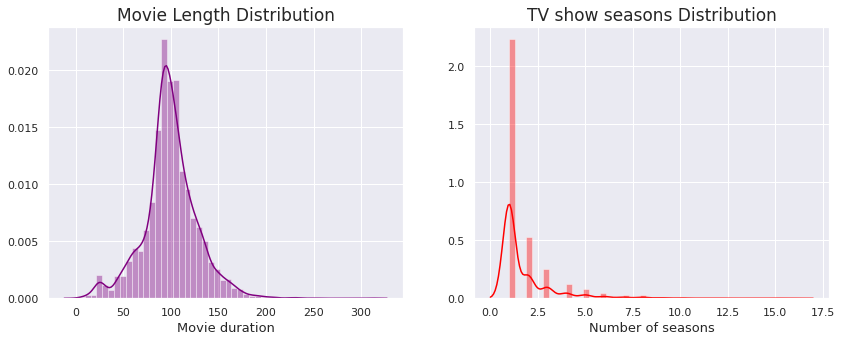

In [54]:
# Plot movie length duration
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(duration[duration['type']=='Movie']['length'],hist=True,color='purple')
plt.ylabel('',fontsize=13)
plt.xlabel('Movie duration',fontsize=13)
plt.title('Movie Length Distribution',fontsize=17)

# Plot tv shows season length duration
plt.subplot(1,2,2)
sns.distplot(duration[duration['type']=='TV_Show']['length'],hist=True,color='red')
plt.ylabel('',fontsize=13)
plt.xlabel('Number of seasons',fontsize=13)
plt.title('TV show seasons Distribution',fontsize=17)

#### <u>Inference</u>: Most movies are of length ~90 mins, there are some rare movies of length ~300 mins i.e 5 hours. Most TV Shows have only one season, there are TV shows having more than 10 seasons. 


### Get rating distribution

In [55]:
rating = df['rating'].value_counts()

Text(0.5, 1.0, 'Rating distribution')

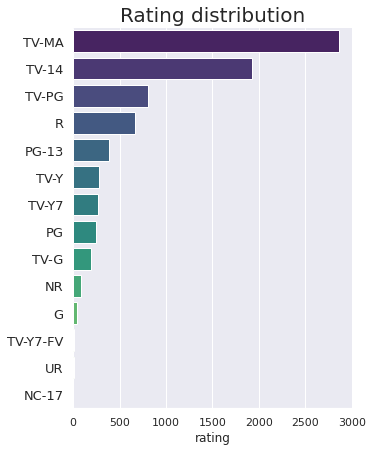

In [56]:
plt.figure(figsize=(5,7))
ax = sns.barplot(y=rating.index, x=rating,palette='viridis',orient='h')
plt.yticks(fontsize=13)
sns.despine(top=True,left=True)
plt.title('Rating distribution',fontsize=20)

#### <u>Inference</u>: Most content is rated for mature audience only

### Content description length

Text(0.5, 1.0, 'Content Description boxplot')

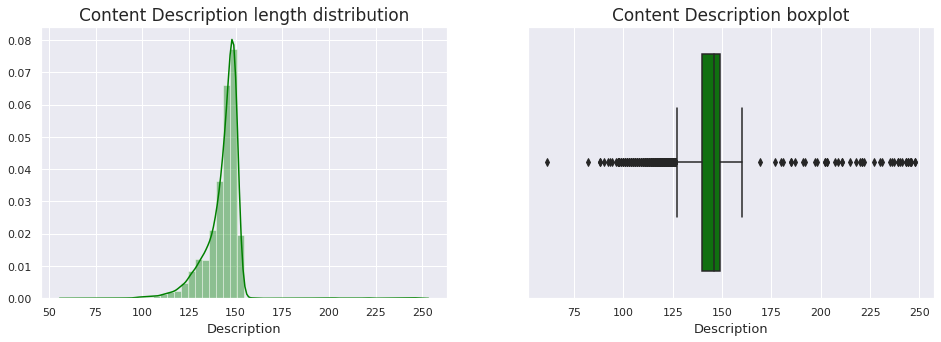

In [57]:
# Get the length of the description feature
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)  # It says plotting 2 graphs in 1 row
sns.distplot(df['description'].apply(lambda x: len(x)), color='green') # Get distplot for description length
plt.ylabel('',fontsize=13)
plt.xlabel('Description',fontsize=13)
plt.title('Content Description length distribution',fontsize=17)

plt.subplot(1,2,2)
sns.boxplot(df['description'].apply(lambda x: len(x)), color='green') # Get boxplot for description length
plt.ylabel('',fontsize=13)
plt.xlabel('Description',fontsize=13)
plt.title('Content Description boxplot',fontsize=17)

#### Inference : Most content has description length of ~140 words. There are outliers on both sides of left and right whiskers of the boxplot. 

####How these outliers may adversely affect the clustering analysis?
If a row has a lower length of characters, most of them may get removed during data cleaning process and this point will be at higher distance from the most clusters. Hence, In clustering analysis as well it will be a outlier. And depending upon distance, it will be a part of closest cluster, giving a bad spread to the cluster. 
Similar for the high length of characters but here the number of characters remained after data cleaning will be awkwardly more than the normal, and so their distances from the other points. It will also give bad spread to the cluster.


## Most used words in content description

Textual Data cleaning process involves,

###<u>Stop words removal</u> : 
The objective is to focus on important words, and removing such commonly occuring words will increase the speed as well. Stop word removal is one of the most commonly used preprocessing steps across different NLP applications. The idea is simply removing the words that occur commonly across all the documents in the corpus. Typically, articles and pronouns are generally classified as stop words.

###<u>Punctuations removal</u> : 
Punctuations do add meaning to sentences but not to words. There are applications where they might be necessary but not in this case.

###<u>Stemming</u> : 
Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. Often when searching text for a certain keyword, it helps if the search returns variations of the word. For instance, searching for “boat” might also return “boats” and “boating”. Here, “boat” would be the stem for [boat, boater, boating, boats].

Stemming is a somewhat crude method for cataloging related words; it essentially chops off letters from the end until the stem is reached. This works fairly well in most cases, but unfortunately English has many exceptions where a more sophisticated process is required.

###<u>Lemmatization</u> : 
In contrast to stemming, lemmatization looks beyond word reduction and considers a language’s full vocabulary to apply a morphological analysis to words. The lemma of ‘was’ is ‘be’ and the lemma of ‘mice’ is ‘mouse’.

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word. 
Text preprocessing includes both Stemming as well as Lemmatization. Many times people find these two terms confusing. Some treat these two as the same. Actually, lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.

Lemmatization is typically seen as much more informative than simple stemming, which is why Spacy has opted to only have Lemmatization available instead of Stemming

Lemmatization looks at surrounding text to determine a given word’s part of speech, it does not categorize phrases.






### This study will only follow, 
* Stop word (English) and punctuation removal

to clean the description data.

Since, words of different forms have different meanings when used in different context.

### Stop words and punctuation removal

In [24]:
# Function to remove punctuations and stop words from the message
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]  # to remove punctuations
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')]) # to remove stopwords

In [25]:
import string
string.punctuation # check the list of punctuations 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
# Get tokenized description by applying text_process function on description feature
df['tokenized_description'] = df['description'].apply(text_process)

In [27]:
# check out some entry from description (This is before tokentization)
df['description'][25]

'This real-life look at FBI counterterrorism operations features access to both sides of a sting: the government informant and the radicalized target.'

In [28]:
# check out same entry from tokenized_description (This is after tokentization)
df['tokenized_description'][25]

'reallife look FBI counterterrorism operations features access sides sting government informant radicalized target'

In [29]:
""" We will be using tf-idf vectorizer which converts txt to vectors, tf : term frequency , idf : inverse document frequency 
(It is arguably better than count vectorizer in many cases,
owing to additional feature of computing documents  frequency in the total documents )"""

# set parameters for tfidfvectorizer
vectorizer = TfidfVectorizer(min_df = 5,
                              max_df = 0.95,
                              max_features = 3000, lowercase=True,
                              stop_words = 'english')

In [30]:
# Define helper functions to get top words
def get_top_n_words(n_top_words, vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

Text(0.5, 1.0, 'Most used words in content description \n(without lemmatization)')

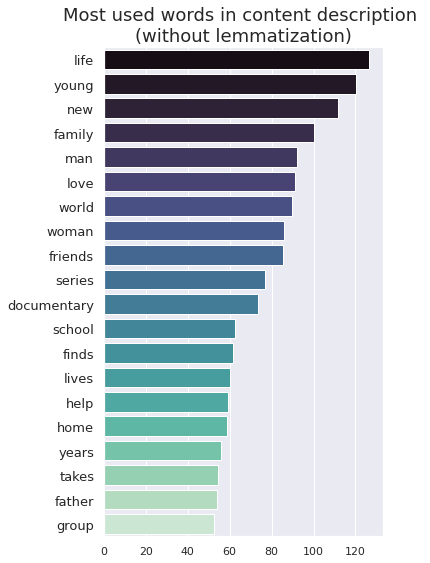

In [31]:
# Get top 20 words and their count from the tokenized_description
plt.figure(figsize=(5,9))
words, word_values = get_top_n_words(n_top_words=20,
                                     vectorizer=vectorizer, 
                                     text_data=df['tokenized_description'])
# Plot top 20 words
sns.barplot(y=words, x=word_values,palette='mako')
plt.yticks(fontsize=13)
plt.title('Most used words in content description \n(without lemmatization)',fontsize=18)

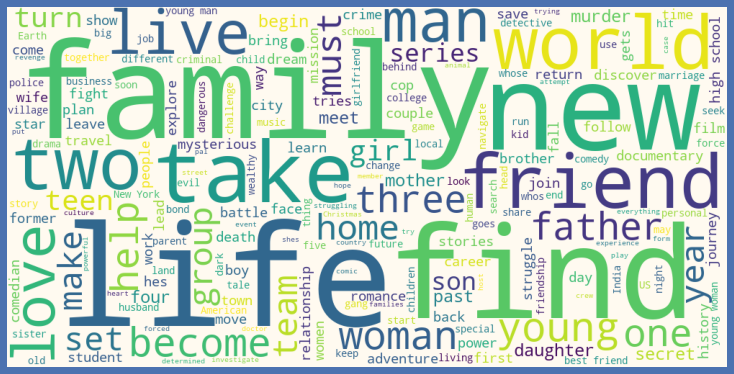

In [32]:
# Plot wordcloud for tokenized description
text = df['tokenized_description']
wordcloud = WordCloud(width = 1000,height = 500,background_color = 'floralwhite').generate(" ".join(text))
fig = plt.figure(figsize = (10, 5),facecolor = 'b',edgecolor = 'k',)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

<u>Inference</u> :  Life, young, new, family and man are the most occuring words from the complete vocabulary of description.

# <b><u>Datasets Creation

The text based features are : 

type, director, cast, country, release_year, rating, listed_in, description



Clustering can be done on:

d : Insights from description - similar content based on the plot alone

actors : Insight from actors, genres and description - similar content based on actors and genres

genres : Similar genres

crgt   :  Insight from type, country, rating and genre: what content is popular in which country



In [21]:
# Import the tfidfvectorizer
"""
max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:
    max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
    max_df = 25 means "ignore terms that appear in more than 25 documents".

min_df is used for removing terms that appear too infrequently. For example:
    min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
    min_df = 5 means "ignore terms that appear in less than 5 documents".
"""
# Intialize the vectorizer
vectorizer = TfidfVectorizer(min_df = 5,
                              max_df = 0.95, max_features = 3000, lowercase=True,
                              stop_words = 'english')

In [22]:
def get_vectorized_df(data):
  """Returns a vectorized dataframe on inputting series or dataframe, if other type is inputted, while provide the error
  vectorizes each column and converts the data to dataframe
  combines all the dataframes"""
  count = 0
  # Iterate through the dataframe columns
  get_type = type(pd.Series([1,2,3]))

  # If data entered is of series type
  if type(data) == get_type:
    # Process the text-based features, remove punctuations and stop words
    data = data.apply(text_process)
    # Apply the vectorizer
    temp = vectorizer.fit_transform(data) # X is in sparse matrix format, to visulaize it we need to convert it into array

    # Store the sparse_matrix data in the dataframe
    temp_v = pd.DataFrame(temp.toarray() , columns=vectorizer.get_feature_names()) # This dataframe will be used for the clustering analysis.

    return temp_v
  
  else:
    for col in data.columns:
      # Process the text-based features
      feature = data[col].apply(text_process)

      # Apply the vectorizer
      temp = vectorizer.fit_transform(feature) # X is in sparse matrix format, to visulaize it we need to convert it into array

      # Store the sparse_matrix data in the dataframe
      temp_v = pd.DataFrame(temp.toarray() , columns=vectorizer.get_feature_names()) # This dataframe will be used for the clustering analysis.

      if count==0:
        prev = temp_v.copy() # Make a copy of 1st processed dataframe

      elif count==1:
        next = pd.concat((prev,temp_v), axis=1) # update the prev dataframe with the columns of temp_v dataframe

      else:
        next = pd.concat((next,temp_v), axis=1) # update the next dataframe with the columns of temp_v dataframe

      count+=1  # Update the count

    if count==0:
      return prev
    else:
      return next # Returns the fully updated dataframe

## Create d dataset (description)

In [33]:
# Save the data in the variable
D = df['tokenized_description'].copy()

# Get vectorized df
d = get_vectorized_df(D) 
# View the vectorized df
d.head()

10  100000  10yearold  11yearold   12  12yearold   13   15  17yearold  \
0  0.0     0.0        0.0        0.0  0.0        0.0  0.0  0.0        0.0   
1  0.0     0.0        0.0        0.0  0.0        0.0  0.0  0.0        0.0   
2  0.0     0.0        0.0        0.0  0.0        0.0  0.0  0.0        0.0   
3  0.0     0.0        0.0        0.0  0.0        0.0  0.0  0.0        0.0   
4  0.0     0.0        0.0        0.0  0.0        0.0  0.0  0.0        0.0   

   1920s  ...  years  yoga  york  young  younger  youth  youtube  zany  \
0    0.0  ...    0.0   0.0   0.0    0.0      0.0    0.0      0.0   0.0   
1    0.0  ...    0.0   0.0   0.0    0.0      0.0    0.0      0.0   0.0   
2    0.0  ...    0.0   0.0   0.0    0.0      0.0    0.0      0.0   0.0   
3    0.0  ...    0.0   0.0   0.0    0.0      0.0    0.0      0.0   0.0   
4    0.0  ...    0.0   0.0   0.0    0.0      0.0    0.0      0.0   0.0   

   zombie  zone  
0     0.0   0.0  
1     0.0   0.0  
2     0.0   0.0  
3     0.0   0.0  
4     0.0   0.0  

[5 rows x 3000 columns]

## Create genres dataset (genres)

In [35]:
# Save the data in the variable
GENRES = df['listed_in'].copy()

# Get vectorized df
genres = get_vectorized_df(GENRES) 
# View the vectorized df
genres.head()

actionadventure  animefeatures  animeseries  britishtvshows  \
0          0.00000            0.0          0.0             0.0   
1          0.00000            0.0          0.0             0.0   
2          0.00000            0.0          0.0             0.0   
3          0.50815            0.0          0.0             0.0   
4          0.00000            0.0          0.0             0.0   

   childrenfamilymovies  classicculttv  classicmovies  comedies  crimetvshows  \
0                   0.0            0.0            0.0       0.0           0.0   
1                   0.0            0.0            0.0       0.0           0.0   
2                   0.0            0.0            0.0       0.0           0.0   
3                   0.0            0.0            0.0       0.0           0.0   
4                   0.0            0.0            0.0       0.0           0.0   

   cultmovies  ...  teentvshows  thrillers  tvactionadventure  tvcomedies  \
0         0.0  ...          0.0        0.0                0.0         0.0   
1         0.0  ...          0.0        0.0                0.0         0.0   
2         0.0  ...          0.0        0.0                0.0         0.0   
3         0.0  ...          0.0        0.0                0.0         0.0   
4         0.0  ...          0.0        0.0                0.0         0.0   

   tvdramas  tvhorror  tvmysteries  tvscififantasy  tvshows  tvthrillers  
0  0.474096       0.0          0.0         0.78437      0.0          0.0  
1  0.000000       0.0          0.0         0.00000      0.0          0.0  
2  0.000000       0.0          0.0         0.00000      0.0          0.0  
3  0.000000       0.0          0.0         0.00000      0.0          0.0  
4  0.000000       0.0          0.0         0.00000      0.0          0.0  

[5 rows x 42 columns]

##Create crgt vectorized dataset, (country, rating, genre, type)

In [36]:
# Save the data in the variable
CRGT = df[df['lead_country']!='no_country'][['lead_country','rating','listed_in','type']].copy()

# Get vectorized df
crgt = get_vectorized_df(CRGT)
# View the vectorized df
crgt.head()

argentina  australia  austria  belgium  brazil  bulgaria  canada  chile  \
0        0.0        0.0      0.0      0.0     1.0       0.0     0.0    0.0   
1        0.0        0.0      0.0      0.0     0.0       0.0     0.0    0.0   
2        0.0        0.0      0.0      0.0     0.0       0.0     0.0    0.0   
3        0.0        0.0      0.0      0.0     0.0       0.0     0.0    0.0   
4        0.0        0.0      0.0      0.0     0.0       0.0     0.0    0.0   

   china  colombia  ...  tvactionadventure  tvcomedies  tvdramas  tvhorror  \
0    0.0       0.0  ...                0.0         0.0  0.479465       0.0   
1    0.0       0.0  ...                0.0         0.0  0.000000       0.0   
2    0.0       0.0  ...                0.0         0.0  0.000000       0.0   
3    0.0       0.0  ...                0.0         0.0  0.000000       0.0   
4    0.0       0.0  ...                0.0         0.0  0.000000       0.0   

   tvmysteries  tvscififantasy  tvshows  tvthrillers  movie  tvshow  
0          0.0        0.776888      0.0          0.0    0.0     1.0  
1          0.0        0.000000      0.0          0.0    1.0     0.0  
2          0.0        0.000000      0.0          0.0    1.0     0.0  
3          0.0        0.000000      0.0          0.0    1.0     0.0  
4          0.0        0.000000      0.0          0.0    1.0     0.0  

[5 rows x 108 columns]

# <b><u>Clustering Models Building</b></u>

## K-Means Clustering 

### Optimal number of clusters

With K-Means clustering, only tough part is selecting number of clusters, since the algorithm will just make as many as you told. 

There are methods like silhouette score and elbow method to find out optimal number of clusters.

#### Silhouette score method



Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

* Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
* Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

The Silhouette Coefficient for a sample is $ S = \frac{(b - a)}{max(a, b)}$.

In [88]:
def find_optimal_clusters(dataset_list, labels_list,color_list):
  """Function takes list of datasets,
  applies minibatchkmeans clustering to them
  and returns the rough estimate of optimal number of clusters for each dataset"""

  # Iterating through the dataset_list
  for i in range(len(dataset_list)):
    data = dataset_list[i]
    label = labels_list[i]
    paint = color_list[i]

    print("***"*5,f"Working on {label}","***"*5)
    print(" ")
    # Choosing the max number of clusters based on the dimension of the data
    # If the data dimension is above 500, then max number of clusters will be 500 due to the system's limitation
    if len(data.columns)>500:
      params = (np.linspace(2,500,10)).astype(int)
    # If the data dimension is above 500, then max number of clusters will be 500 due to the system's limitation
    else:
      params = (np.linspace(2,len(data.columns),10)).astype(int)

    iters = params
    sse = []
    ss = []

    # Iterating through the parameters
    for k in iters:
      # Create model and get necessary attributes
      model = MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data)
      model_labels = model.labels_
      model_inertia = model.inertia_

      # Get performance scores
      sse.append(model_inertia)
      ss.append(silhouette_score(data, model_labels))

    plt.figure(figsize=(16,6))
    #Plot elbow plot
    plt.subplot(1,2,1) 
    plt.plot(iters, sse, marker='o',color=paint)
    plt.xlabel('Cluster Centers',fontsize=13)
    plt.ylabel('SSE',fontsize=13)
    plt.title(f'Elbow Plot for {label}',fontsize=18,color=paint)

    # Plot silhouette score plot
    plt.subplot(1,2,2) 
    sns.barplot(iters,ss,color=paint)
    plt.xlabel('Cluster Centers',fontsize=13)
    plt.ylabel('Silhouette score',fontsize=13)
    plt.title(f'Silhouette score plot for {label}',fontsize=18,color=paint)

    plt.show()
    # Print optimal number of clusters
    print(" ")
    best_cluster_centers = params[ss.index(max(ss))]
    print("---"*10)
    print(f"For dataset {label}, optimal number of clusters are {best_cluster_centers}")
    print("---"*10)
    print(" ")

*************** Working on description ***************
 


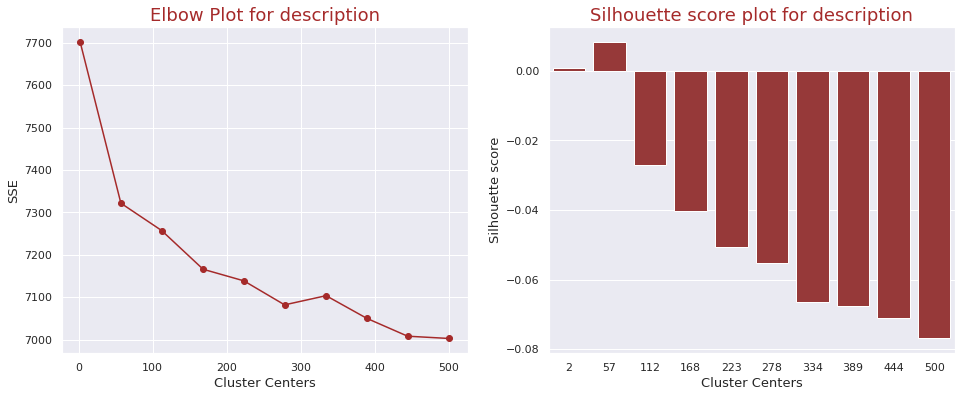

 
------------------------------
For dataset description, optimal number of clusters are 57
------------------------------
 
*************** Working on genres ***************
 


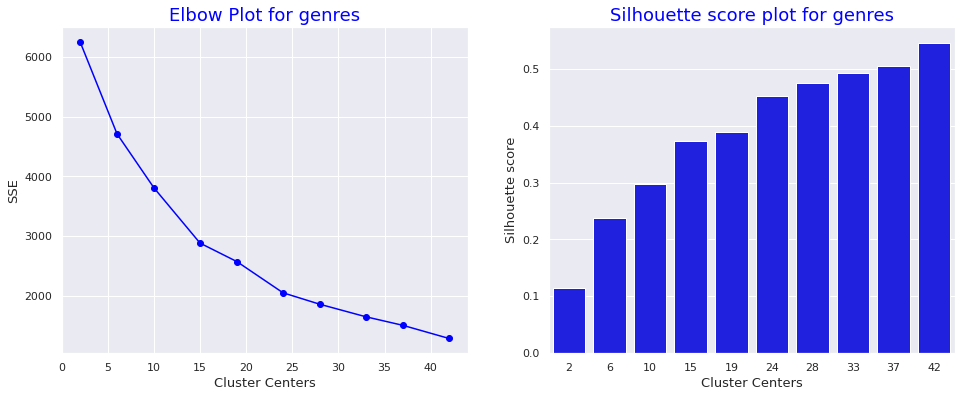

 
------------------------------
For dataset genres, optimal number of clusters are 42
------------------------------
 
*************** Working on country_rating_genres_type ***************
 


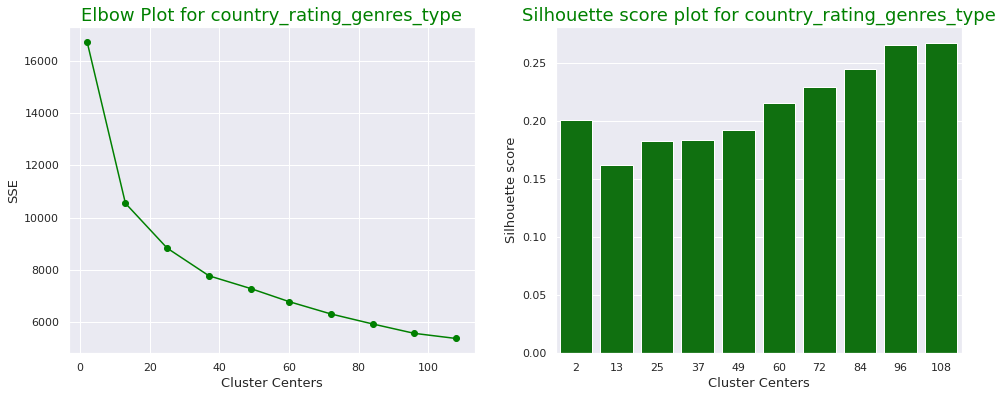

 
------------------------------
For dataset country_rating_genres_type, optimal number of clusters are 108
------------------------------
 


In [89]:
# Create dataset_list, labels_list and the color_list
dataset_list = [d,genres,crgt]
labels_list = ['description','genres','country_rating_genres_type']
color_list = ['brown','blue','green']

# Find the optimal number of clusters using find_optimal_clusters
find_optimal_clusters(dataset_list, labels_list,color_list)

In [77]:
# *******Investigating description dataset a little more*******

def investigate_deep_for_cluster(data,params):
  # candidate values for our number of cluster
  parameters = params
  
  ss = []
  # evaluation based on silhouette_score
  for k in parameters:
      # Create model and get necessary attributes
      model = MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data)
      model_labels = model.labels_

      # Get performance scores
      ss.append(silhouette_score(data, model_labels))

  # Plot silhouette score plot
  plt.figure(figsize=(9,6))
  sns.barplot(parameters,ss,color='brown')
  plt.xlabel('Cluster Centers',fontsize=13)
  plt.ylabel('Silhouette score',fontsize=13)
  plt.title(f'Silhouette score plot for description',fontsize=18,color='brown')
  plt.show()
  # Print optimal number of clusters
  print(" ")
  best_cluster_centers = parameters[ss.index(max(ss))]
  print("---"*10)
  print(f"For dataset description, optimal number of clusters are {best_cluster_centers}")
  print("---"*10)
  print(" ")

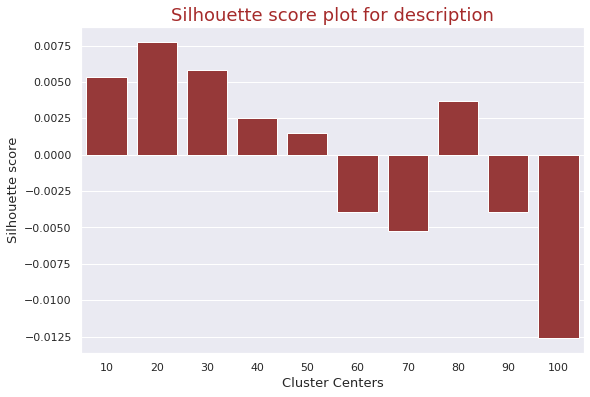

 
------------------------------
For dataset description, optimal number of clusters are 20
------------------------------
 


In [78]:
data = d.copy()
params = (np.linspace(10,100,10)).astype(int) # searching between 10 to 100

# Investigate deep
investigate_deep_for_cluster(data,params)

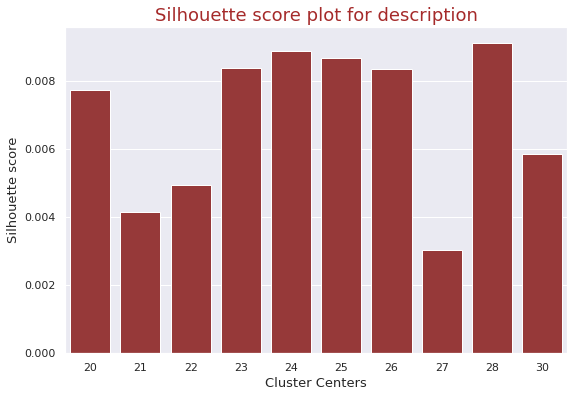

 
------------------------------
For dataset description, optimal number of clusters are 28
------------------------------
 


In [79]:
data = d.copy()
params = (np.linspace(20,30,10)).astype(int) # searching between 20 to 30

# Investigate deep
investigate_deep_for_cluster(data,params)

<u>Inference </u>: Optimal number of clusters for the datasets description, actors, genres, country_rating_genre_type are 28, 500, 42 and 108 respectively.

### Training the k-means clustering model 

In [37]:
# Train the MiniBatchKMeans clustering model for description dataset
clusters_d = MiniBatchKMeans(n_clusters=28, init_size=1024, batch_size=2048, random_state=20).fit_predict(d)
# Train the MiniBatchKMeans clustering model for genres dataset
clusters_genres= MiniBatchKMeans(n_clusters=42, init_size=1024, batch_size=2048, random_state=20).fit_predict(genres)
# Train the MiniBatchKMeans clustering model for crgt dataset
clusters_crgt = MiniBatchKMeans(n_clusters=108, init_size=1024, batch_size=2048, random_state=20).fit_predict(crgt)

#### Performance check [Model: MiniBatchKMeans clustering]

#####davies_bouldin_score
The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

In [81]:
# Davies bouldin score, closer to 0 means better partition
print(f'davies_bouldin_score for description data : {davies_bouldin_score(d, clusters_d)}')

print(f'davies_bouldin_score for genres data : {davies_bouldin_score(genres, clusters_genres)}')

print(f'davies_bouldin_score for crgt data : {davies_bouldin_score(crgt, clusters_crgt)}')

davies_bouldin_score for description data : 8.06551139309477
davies_bouldin_score for genres data : 1.1262425701503749
davies_bouldin_score for crgt data : 1.7375130040907825


In [82]:
# Silhouette score, closer to 1 means better partition
print(f'Silhouette_score for description data : {silhouette_score(d, clusters_d)}')

print(f'Silhouette_score for genres data : {silhouette_score(genres, clusters_genres)}')

print(f'Silhouette_score for crgt data : {silhouette_score(crgt, clusters_crgt)}')

Silhouette_score for description data : 0.009125250090087638
Silhouette_score for genres data : 0.5457281919294956
Silhouette_score for crgt data : 0.26778805385782056


###Have a look at the results!

####<u><b>Plot the clusters</u></b>

In [67]:
sns.set_style("whitegrid") # Setting white background for the clusters

In [68]:
def plot_tsne_pca(data, labels):
  """Retuns 
  scatter plot of data reduced to 2 dimensions using pca
  scatter plot of data reduced to 40 dimensions using tsne"""
  max_label = max(labels)

  pca = PCA(n_components=2).fit_transform(data)  # reducing the data to 2 principal components using pca
  tsne = TSNE().fit_transform(PCA(n_components=40).fit_transform(data)) # reducing the data to 50 principal components using pca and transform using tsne
  
  idx = np.random.choice(range(pca.shape[0]), size=5000, replace=False)
  label_subset = [cm.hsv(i/max_label) for i in labels[idx]]
  
  plt.figure(figsize=(18, 8))
  plt.subplot(1,2,1)
  sns.scatterplot(pca[idx, 0], pca[idx, 1], c=label_subset, s=90) # Plot pca0 vs pca1
  plt.title('PCA Cluster Plot')
  plt.grid(False)

  plt.subplot(1,2,2)
  sns.scatterplot(tsne[idx, 0], tsne[idx, 1], c=label_subset, s=90) # Plot tsne0 vs tsne1
  plt.title('TSNE Cluster Plot')
  plt.grid(False)
  plt.show()

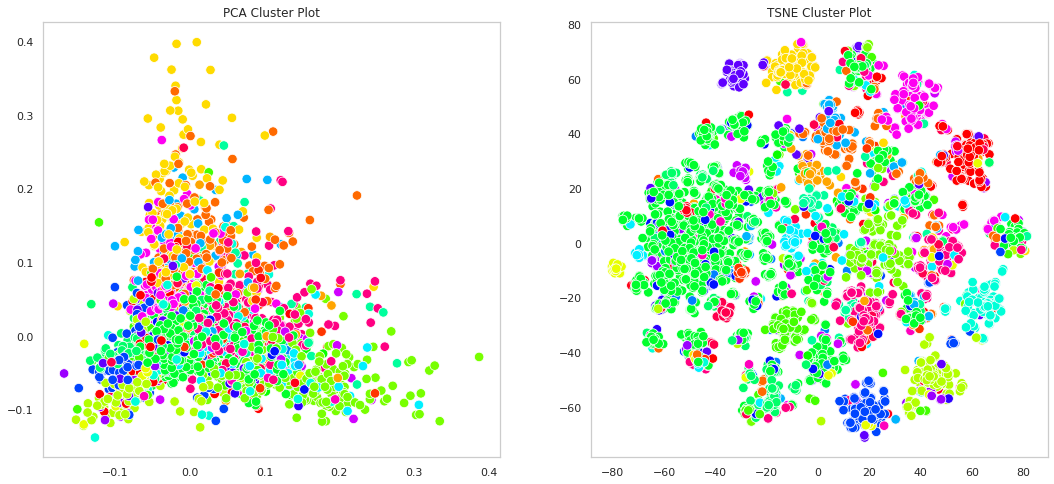

In [85]:
# Visualize the clusters in dataset description 
plot_tsne_pca(d, clusters_d)

We have 28 clusters for the description dataset. Observing the plot we can say that MiniBatchKMeans has done a pretty descent job at forming clusters.

The clusters can be viewed separately. There seems a possibility of one or more large clusters. But, most clusters are in comparatively similar sizes. The clusters are spherical in shape, this is what KMeans do, make spheroidal clusters.



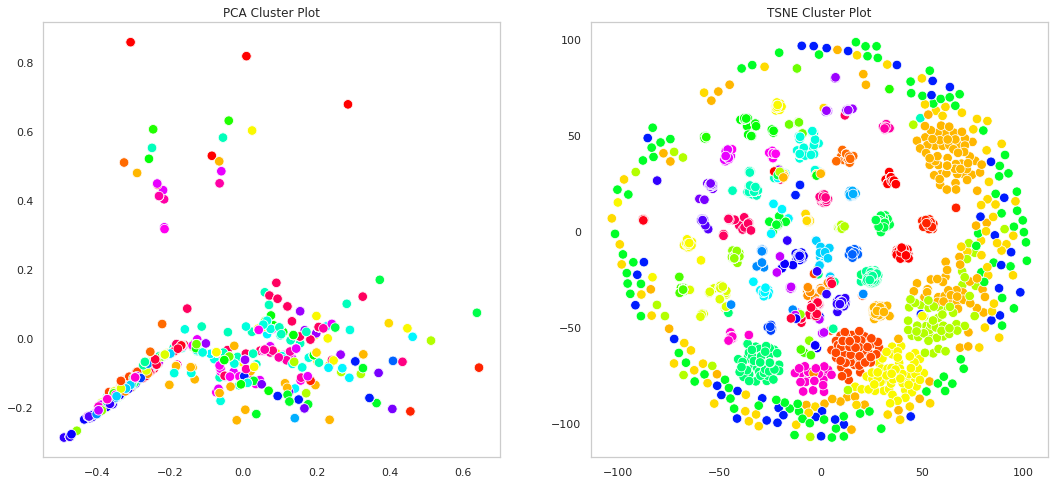

In [87]:
# Visualize the clusters in dataset genres
plot_tsne_pca(genres, clusters_genres)

We have 42 clusters for genres dataset and KMeans has done a decent job but the clusters could have been better-separated. Perhaps a spectral or agglomerative or DBSCAN clustering method will give better results.

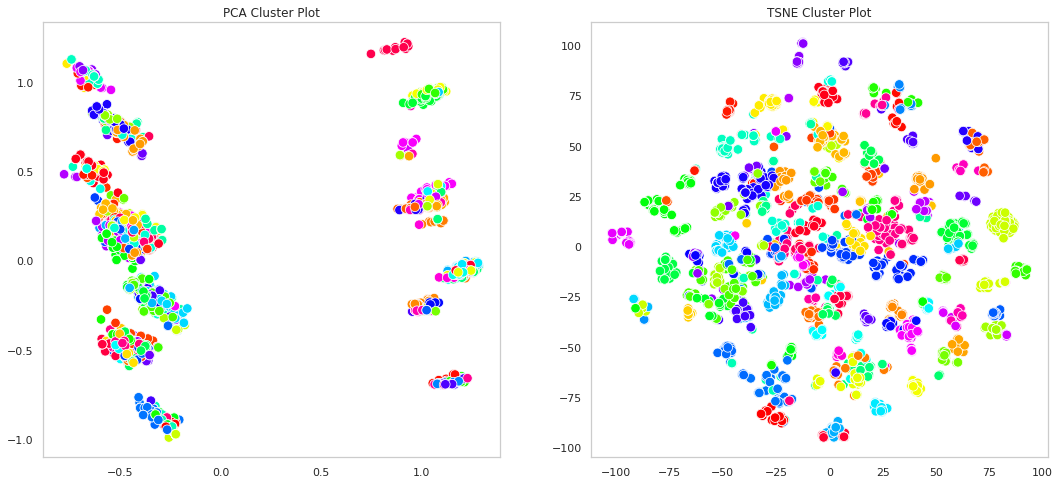

In [88]:
# Visualize the clusters in dataset country_rating_genres_type
plot_tsne_pca(crgt, clusters_crgt)

We have 108 clusters for country_rating_genres_type dataset, and by observing the plots, the KMeans has done a good job at separating the similar data.
Overall the separation looks pretty good. 

 I would say that K-Means did a pretty decent job at clustering. Let's see them clusters and find similiar content.

#### <b><u>Check out the results</b></u>

In [38]:
def get_cluster_labels_list(data, clusters, labels, n_terms):
  #label_data = vectorizer.fit_transform(label_data)
  #labels = vectorizer.get_feature_names()
  df = pd.DataFrame(data).groupby(clusters).mean()
  label_list = []
  for i,r in df.iterrows():
      label_list.append(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
  return label_list 

In [57]:
def get_cluster_info(vectorized_df, cluster_labels):
  
  # Merge the dataset first
  if cluster_labels.shape[0] == df.shape[0]:
    temp = df.copy()
  else:
    temp = df[df['country']!='no_country']

  # Add cluster column
  temp['cluster'] = cluster_labels  
  n_clusters = temp['cluster'].nunique() # Get total number of clusters

  # Get top_keywords
  top_keywords = get_cluster_labels_list(vectorized_df, cluster_labels, vectorized_df.columns, n_clusters)

  # Get cluster_size
  cluster_size = []
  for i in range(n_clusters):
    content_count = temp[temp['cluster']==i]['title'].count()
    cluster_size.append(content_count)

  # Get similar content list
  content_list = [temp[temp['cluster']==i]['title'].tolist() for i in range(temp['cluster'].nunique())]

  # Create cluster_df
  cluster_df = pd.DataFrame(list(zip(top_keywords, cluster_size,content_list)), columns =['Top_keywords','Cluster_size','Similar_content'])

  print("The cluster size variation looks like... ")
  print(" ")
  # Plot the clustersize
  plt.figure(figsize=(15,5))
  sns.set()
  sns.lineplot(y=cluster_df['Cluster_size'],x=range(cluster_df.shape[0]),markers=['+'],linewidth=2,label='Cluster sizes')

  plt.axhline(y=cluster_df['Cluster_size'].mean(),label=f'Avg cluster size : {int(cluster_df["Cluster_size"].mean())}',c='red')
  plt.grid(False)
  plt.xlabel('Cluster centres',fontsize=14)
  plt.ylabel('Cluster Size',fontsize=14)
  plt.title('Cluster center vs cluster size comparison',fontsize=20)
  plt.legend()
  plt.show() # To show it here, before the cluster_df

  print(" ") # Adding a gap between the results
  print(f"The keywords in the largest cluster are, \n{cluster_df[cluster_df['Cluster_size']==cluster_df['Cluster_size'].max()]['Top_keywords'].tolist()[0]}")
  print(" ")
  print("The resultant dataframe of cluster info is... ")
  print(" ")

  # Return the sorted cluster_df
  return cluster_df.sort_values('Cluster_size',ascending=False)

The cluster size variation looks like... 
 


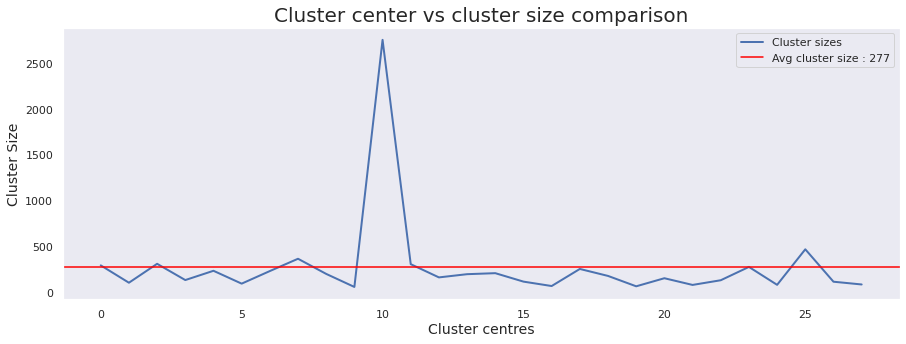

 
The keywords in the largest cluster are, 
evil,past,personal,gets,son,film,boy,stories,friend,hes,wife,save,police,detective,tries,crime,years,death,time,father,group,finds,woman,home,help,murder,young,life
 
The resultant dataframe of cluster info is... 
 


Top_keywords  Cluster_size  \
10  evil,past,personal,gets,son,film,boy,stories,f...          2751   
25  work,falling,death,secrets,determined,based,da...           470   
7   tries,love,past,son,friend,marry,romance,wealt...           367   
2   build,city,face,monsters,begins,friendship,old...           312   
11  celebrity,based,sly,sex,humor,funny,joins,deli...           308   
0   battle,finds,adventure,fight,learning,women,dr...           295   
23  teamwork,come,treasure,day,magical,save,young,...           278   
17  young,explores,tales,people,action,friends,ori...           256   
4   young,club,love,bus,boarding,girls,boy,years,f...           236   
6   music,convicted,tour,short,spotlights,share,pe...           233   
14  husband,emotional,shes,widowed,finds,boy,save,...           210   
8   star,real,thoughts,fatherhood,soon,celebrity,r...           202   
13  years,new,fight,secret,past,romantic,upended,a...           199   
18  widow,theyre,past,brothers,father,stop,solve,b...           180   
12  true,befriends,dream,marry,dark,rich,little,fi...           164   
20  life,thieves,bring,agents,championship,crimina...           155   
3   learns,daily,community,seaside,adventures,mayo...           135   
22  deaths,invitation,secret,boy,help,students,beg...           133   
15  history,adult,culture,changed,daughter,comic,p...           118   
26  easy,struggles,man,feelings,fun,living,fame,he...           117   
1   meets,secret,struggling,door,children,living,a...           106   
5   role,world,worlds,epic,lessons,biggest,tumultu...            96   
27  man,evil,women,trek,big,production,robbers,pro...            87   
24  family,seeks,hotel,rival,plot,science,begins,d...            83   
21  songs,features,helped,world,band,1990s,intimat...            82   
16  friendship,race,wedding,unexpected,joins,film,...            70   
19  attracted,examine,protect,empire,singer,iconic...            67   
9   school,memory,tokyo,finds,gang,ring,ancient,de...            60   

                                      Similar_content  
10  [7:19, 23:59, 21, 46, 706, 1920, 1922, 1983, O...  
25  [15-Aug, 100 Days My Prince, 14 Cameras, 365 D...  
7   [10 Days in Sun City, 100 Meters, 13 Sins, 20 ...  
2   [​Mayurakshi, A Christmas Catch, A Fall from G...  
11  [25 Kille, 3 Days to Kill, 93 Days, A Little H...  
0   [9, Òlòtūré, 2015 Dream Concert, 21 Again, A B...  
23  [Feb-09, #FriendButMarried 2, #Selfie 69, 3 Id...  
17  [#blackAF, 13 Reasons Why, 72 Cutest Animals, ...  
4   [187, #FriendButMarried, #realityhigh, 1 Chanc...  
6   [2,215, #AnneFrank - Parallel Stories, #Rucker...  
14  [¡Ay, mi madre!, 10,000 B.C., 18 Presents, 37 ...  
8   [(Un)Well, 20 Feet From Stardom, A Leaf of Fai...  
13  [​Goli Soda 2, 20th Century Women, 3 Türken & ...  
18  [3%, 2 Alone in Paris, A Ghost Story, A Glimps...  
12  [#Roxy, 7 Din Mohabbat In, A Perfect Ending, A...  
20  [100% Hotter, 21 Thunder, 6 Underground, A 2nd...  
3   [​Maj Rati ​​Keteki, Çarsi Pazar, A Go! Go! Co...  
22  [3022, 28 Moons, 40 Sticks, A Land Imagined, A...  
15  [5 to 7, A Mighty Team, A Most Violent Year, A...  
26  [#Selfie, 16 Blocks, A Queen Is Born, A Silent...  
1   [122, 12 Years Promise, 5 Flights Up, 6 Years,...  
5   [A Family Affair, Age of Tanks, Ancient Aliens...  
27  [Agyaat, Almost Love, Arctic Dogs, As Above, S...  
24  [A House of Blocks, A Taiwanese Tale of Two Ci...  
21  [1994, '89, 3 Deewarein, American Circumcision...  
16  [10 jours en or, 4L, Ali Wong: Baby Cobra, Ame...  
19  [​SAINT SEIYA: Knights of the Zodiac, #cats_th...  
9   [#Alive, 1BR, A Go! Go! Cory Carson Christmas,...

In [58]:
# Get clusters info for description dataset
get_cluster_info(d, clusters_d)

The cluster size variation looks like... 
 


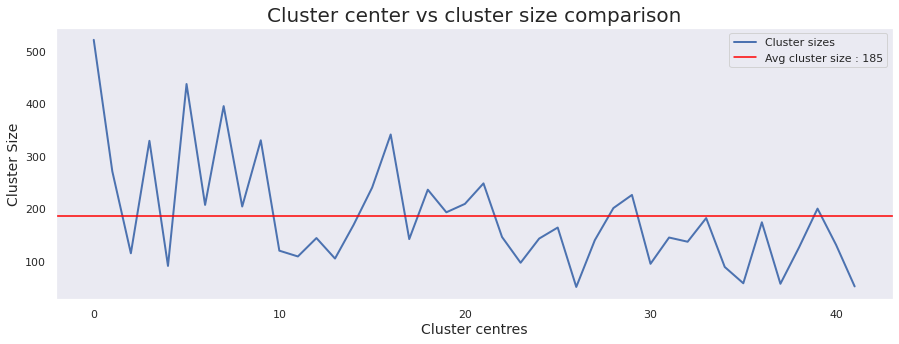

 
The keywords in the largest cluster are, 
actionadventure,realitytv,romanticmovies,romantictvshows,sciencenaturetv,scififantasy,spanishlanguagetvshows,sportsmovies,standupcomedy,standupcomedytalkshows,teentvshows,thrillers,tvactionadventure,tvcomedies,tvdramas,tvhorror,tvmysteries,tvscififantasy,musicmusicals,movies,lgbtqmovies,koreantvshows,animefeatures,animeseries,britishtvshows,childrenfamilymovies,classicculttv,crimetvshows,tvshows,cultmovies,faithspirituality,horrormovies,independentmovies,internationaltvshows,kidstv,docuseries,tvthrillers,dramas,comedies,classicmovies,internationalmovies,documentaries
 
The resultant dataframe of cluster info is... 
 


Top_keywords  Cluster_size  \
0   actionadventure,realitytv,romanticmovies,roman...           521   
5   lgbtqmovies,realitytv,romanticmovies,romantict...           437   
7   lgbtqmovies,musicmusicals,realitytv,romantictv...           395   
16  actionadventure,realitytv,romanticmovies,roman...           341   
9   lgbtqmovies,realitytv,romanticmovies,romantict...           330   
3   actionadventure,realitytv,romanticmovies,roman...           329   
1   actionadventure,realitytv,romanticmovies,roman...           271   
21  lgbtqmovies,musicmusicals,realitytv,romantictv...           248   
15  lgbtqmovies,musicmusicals,realitytv,romantictv...           240   
18  actionadventure,movies,musicmusicals,realitytv...           236   
29  actionadventure,movies,musicmusicals,realitytv...           226   
20  lgbtqmovies,tvshows,movies,realitytv,romantict...           209   
6   actionadventure,musicmusicals,realitytv,romant...           207   
8   actionadventure,tvscififantasy,tvmysteries,thr...           204   
28  actionadventure,tvshows,movies,musicmusicals,r...           201   
39  lgbtqmovies,movies,realitytv,romantictvshows,s...           200   
19  lgbtqmovies,movies,realitytv,romantictvshows,s...           193   
33  actionadventure,tvshows,movies,musicmusicals,r...           182   
36  actionadventure,movies,musicmusicals,realitytv...           174   
14  lgbtqmovies,musicmusicals,realitytv,romantictv...           169   
25  actionadventure,realitytv,romanticmovies,roman...           164   
22  actionadventure,movies,musicmusicals,realitytv...           146   
31  actionadventure,musicmusicals,realitytv,romant...           145   
12  actionadventure,movies,musicmusicals,romanticm...           144   
24  actionadventure,tvscififantasy,tvmysteries,thr...           143   
17  actionadventure,tvscififantasy,tvmysteries,thr...           142   
27  lgbtqmovies,realitytv,romanticmovies,romantict...           140   
32  lgbtqmovies,musicmusicals,realitytv,romantictv...           137   
40  actionadventure,thrillers,standupcomedytalksho...           131   
38  actionadventure,realitytv,romanticmovies,roman...           126   
10  actionadventure,movies,musicmusicals,realitytv...           120   
2   actionadventure,movies,musicmusicals,realitytv...           115   
11  actionadventure,musicmusicals,realitytv,romant...           109   
13  actionadventure,realitytv,romanticmovies,roman...           105   
23  actionadventure,realitytv,romanticmovies,roman...            97   
30  actionadventure,movies,musicmusicals,realitytv...            95   
4   actionadventure,thrillers,standupcomedy,sports...            91   
34  actionadventure,movies,realitytv,romantictvsho...            89   
35  tvthrillers,spanishlanguagetvshows,standupcome...            58   
37  lgbtqmovies,movies,realitytv,romantictvshows,s...            57   
41  actionadventure,realitytv,romanticmovies,roman...            52   
26  actionadventure,musicmusicals,realitytv,romant...            51   

                                      Similar_content  
0   [(T)ERROR, #AnneFrank - Parallel Stories, #cat...  
5   [48 Christmas Wishes, A Babysitter's Guide to ...  
7   [​Goli Soda 2, 10,000 B.C., 14 Blades, 16 Bloc...  
16  [7:19, ​Maj Rati ​​Keteki, ​Mayurakshi, Òlòtūr...  
9   [​​Kuch Bheege Alfaaz, 18 Presents, 20th Centu...  
3   [A Russell Peters Christmas, Adam Devine: Best...  
1   [#Selfie, #Selfie 69, 10 jours en or, 2 States...  
21  [#FriendButMarried, #FriendButMarried 2, 1 Cha...  
15  [#Roxy, 10 Days in Sun City, 5 to 7, 50 First ...  
18  [44 Cats, Abby Hatcher, Alphablocks, Ask the S...  
29  [Feb-09, 21 Sarfarosh: Saragarhi 1897, A Boy N...  
20  [9, 3022, Æon Flux, 2036 Origin Unknown, 2307:...  
6   [1922, Oct-01, 22-Jul, 26 Years, 3 Deewarein, ...  
8   [(Un)Well, 100% Hotter, 21 Again, 60 Days In, ...  
28  [1983, Şubat, 20 Minutes, 21 Thunder, Ad Vitam...  
39  [2015 Dream Concert, 7 Din Mohabbat In, 90 ML,...  
19  [2,215, '89, #Rucker50, 1 Mile 

In [59]:
# Get clusters info for genres dataset
get_cluster_info(genres, clusters_genres)

The cluster size variation looks like... 
 


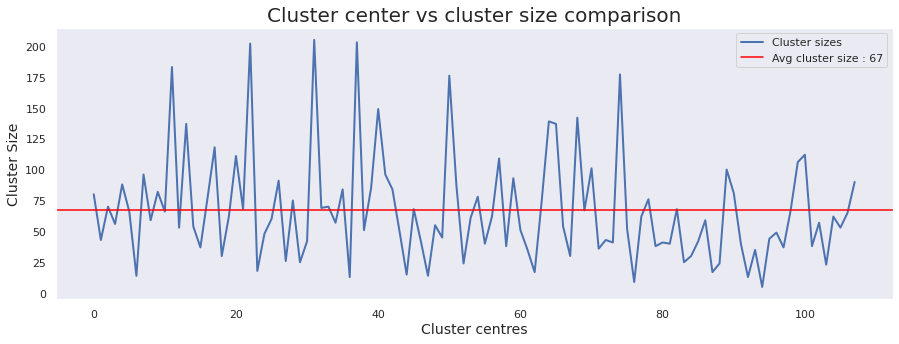

 
The keywords in the largest cluster are, 
argentina,crimetvshows,classicculttv,childrenfamilymovies,britishtvshows,animeseries,animefeatures,actionadventure,ur,tvy7fv,tvy7,tvy,tvpg,tvg,tv14,pg13,pg,vietnam,uruguay,unitedstates,cultmovies,docuseries,faithspirituality,horrormovies,tvthrillers,tvshows,tvscififantasy,tvmysteries,tvhorror,tvdramas,tvcomedies,tvactionadventure,teentvshows,unitedkingdom,standupcomedytalkshows,spanishlanguagetvshows,sciencenaturetv,romantictvshows,realitytv,movies,lgbtqmovies,koreantvshows,kidstv,internationaltvshows,standupcomedy,turkey,nr,tvshow,kuwait,india,iceland,mexico,hongkong,france,nigeria,russia,thailand,chile,switzerland,spain,saudiarabia,bulgaria,ireland,peru,finland,colombia,comedies,norway,czechrepublic,malaysia,sweden,pakistan,israel,unitedarabemirates,china,belgium,indonesia,austria,taiwan,newzealand,singapore,romania,classicmovies,scififantasy,japan,netherlands,lebanon,denmark,musicmusicals,egypt,southafrica,australia,brazil,sportsmovies,ger

Top_keywords  Cluster_size  \
31  argentina,crimetvshows,classicculttv,childrenf...           205   
37  argentina,classicculttv,childrenfamilymovies,b...           203   
22  argentina,faithspirituality,dramas,docuseries,...           202   
11  nr,dramas,docuseries,cultmovies,crimetvshows,c...           183   
74  nr,cultmovies,crimetvshows,classicculttv,briti...           177   
..                                                ...           ...   
47  argentina,faithspirituality,docuseries,cultmov...            14   
92  argentina,docuseries,documentaries,cultmovies,...            13   
36  argentina,faithspirituality,dramas,documentari...            13   
76  argentina,documentaries,cultmovies,comedies,cl...             9   
94  argentina,faithspirituality,docuseries,cultmov...             5   

                                      Similar_content  
31  [100 Meters, 18 Presents, 26 Years, 365 Days, ...  
37  [1920, 6-5=2, 7 Khoon Maaf, A Scandall, A Wedn...  
22  [Adam Devine: Best Time of Our Lives, ADAM SAN...  
11  [#AnneFrank - Parallel Stories, #cats_the_mewv...  
74  [Çarsi Pazar, 10 jours en or, 100% Halal, 30 D...  
..                                                ...  
47  [Expo, Halo: The Fall of Reach, IO, Larceny, P...  
92  [Dry Martina, Fabrizio Copano: Solo pienso en ...  
36  [Amazing Interiors, Battlefield Recovery, Cabi...  
76  [Baby, Curon, Gomorrah, Luna Nera, Medici: Mas...  
94  [A Twelve Year Night, Alelí, Alexis Viera: A S...  

[108 rows x 3 columns]

In [60]:
# Get clusters info for description dataset
get_cluster_info(crgt, clusters_crgt)

<u>Inference</u>: Since the keywords are many in number the clusters we got are still large in size (>20 items in each cluster), so building a recommendation system on top of such similar content is still not ideal. But, the results can be used for the first level of filter before genres

## Hierarchical Clustering (method = ward)

### Optimal number of clusters

In [103]:
# generate the linkage matrix
ward_cluster = linkage(d, 'ward')

* Thing you can and should definitely do is check the Cophenetic Correlation Coefficient of your clustering with help of the cophenet() function. 

* This (very very briefly) compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances, which in our case is pretty close:

In [104]:
c, coph_dists = cophenet(ward_cluster, pdist(d))
c

0.04194936814509658

No matter what method and metric you pick, the linkage() function will use that method and metric to calculate the distances of the clusters (starting with your n individual samples (aka data points) as singleton clusters)) and in each iteration will merge the two clusters which have the smallest distance according the selected method and metric. It will return an array of length n - 1 giving you information about the n - 1 cluster merges which it needs to pairwise merge n clusters. Z[i] will tell us which clusters were merged in the i-th iteration, let's take a look at the first two points that were merged:

In [105]:
ward_cluster[0]

array([1373., 1374.,    0.,    2.])

We can see that each row of the resulting array has the format,
<b>[idx1, idx2, dist, sample_count].</b>

In its first iteration the linkage algorithm decided to merge the two clusters (original samples here) with indices 4.593e+03 and 4.594e+03, as they had a distance of 0. This created a cluster with a total of 2 samples.


In [106]:
ward_cluster[1]

array([1482., 1483.,    0.,    2.])

In the second iteration the algorithm decided to merge the clusters (original samples here as well) with indices 4.595e+03 and 7.787e+03, which had a distance of 0. This again formed another cluster with a total of 3 samples.

The indices of the clusters until now correspond to our samples. Remember that we had a total of 7788 samples, so indices 0 to 7787. Let's have a look at the first 20 iterations:


In [107]:
ward_cluster[:20]

array([[1.373e+03, 1.374e+03, 0.000e+00, 2.000e+00],
       [1.482e+03, 1.483e+03, 0.000e+00, 2.000e+00],
       [6.022e+03, 6.023e+03, 0.000e+00, 2.000e+00],
       [6.024e+03, 7.772e+03, 0.000e+00, 3.000e+00],
       [1.283e+03, 1.284e+03, 0.000e+00, 2.000e+00],
       [4.578e+03, 4.579e+03, 0.000e+00, 2.000e+00],
       [4.580e+03, 7.775e+03, 0.000e+00, 3.000e+00],
       [4.980e+02, 4.426e+03, 0.000e+00, 2.000e+00],
       [5.380e+03, 5.381e+03, 0.000e+00, 2.000e+00],
       [4.590e+03, 6.704e+03, 0.000e+00, 2.000e+00],
       [5.682e+03, 5.683e+03, 0.000e+00, 2.000e+00],
       [2.337e+03, 2.338e+03, 0.000e+00, 2.000e+00],
       [2.339e+03, 7.781e+03, 0.000e+00, 3.000e+00],
       [3.660e+02, 5.230e+02, 0.000e+00, 2.000e+00],
       [1.310e+02, 5.494e+03, 0.000e+00, 2.000e+00],
       [5.495e+03, 7.784e+03, 0.000e+00, 3.000e+00],
       [4.823e+03, 4.824e+03, 0.000e+00, 2.000e+00],
       [5.070e+02, 5.080e+02, 0.000e+00, 2.000e+00],
       [2.978e+03, 6.470e+03, 0.000e+00, 2.000

#### Dendogram

In [108]:
# Using the dendogram to find the optimal number of clusters
"""Normal dendogram
plt.figure(figsize=(15,7))
dendrogram = sch.dendrogram(sch.linkage(sparse_df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line
"""

"Normal dendogram\nplt.figure(figsize=(15,7))\ndendrogram = sch.dendrogram(sch.linkage(sparse_df, method = 'ward'))\nplt.title('Dendrogram')\nplt.xlabel('Customers')\nplt.ylabel('Euclidean Distances')\nplt.show() # find largest vertical distance we can make without crossing any other horizontal line\n"

In [109]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

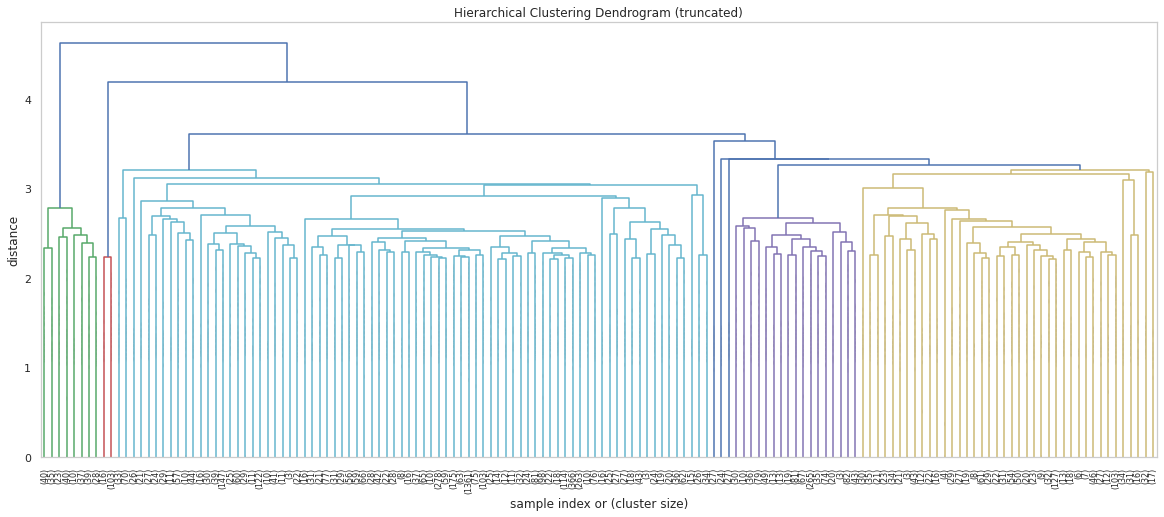

In [110]:
plt.figure(figsize=(20,8))
fancy_dendrogram(
    ward_cluster,
    truncate_mode='lastp',
    p=150,
    leaf_rotation=90.,
    leaf_font_size=8.,
    show_contracted=True,
    annotate_above=10,
    max_d=None,  # plot a horizontal cut-off line
)
plt.grid(False)
plt.show()

If this is the first time you see a dendrogram, it's probably quite confusing, so let's take this apart...

  * On the x axis you see labels. If you don't specify anything else they are the indices of your samples in X.
  *  On the y axis you see the distances (of the 'ward' method in our case).




#### Optimal number of clusters
Let's have a look at last 35 distancees and try to comment on what is a good number for number of clusters, the sudden jump in the distances is what we are aiming for, let's have a look,

In [111]:
ward_cluster[-35:,2]

array([2.63616678, 2.65299654, 2.65543078, 2.65879533, 2.66761484,
       2.67210456, 2.68890998, 2.68901769, 2.6985852 , 2.70685141,
       2.75646512, 2.77537936, 2.77720709, 2.77809704, 2.78045163,
       2.85736937, 2.88719529, 2.9137111 , 2.92393495, 3.00377073,
       3.03072783, 3.04455896, 3.09380189, 3.10941581, 3.15607099,
       3.17676025, 3.20050107, 3.20487021, 3.25961067, 3.32984909,
       3.33143883, 3.52163234, 3.60680256, 4.18420488, 4.6202023 ])

The distances seems too close, noticeable jump is at last 2nd, meaning we can have two good clusters.

Get the differential jump of last thirty distances,

In [112]:
# Reverse the order 
temp_distances = ward_cluster[-35:,2][::-1]
jump = []  # The difference will be saved in this list
# Iterate through the list of distances
for i in range(30):
  jump.append(temp_distances[i]-temp_distances[i+1]) # Append the distance difference between current and next distance

# Get the distance jump list
jump

[0.435997416313068,
 0.5774023181053929,
 0.08517021849316508,
 0.1901935104568353,
 0.001589745858736169,
 0.0702384173246231,
 0.05474046322646586,
 0.004369141529287468,
 0.02374081978911624,
 0.020689255806588314,
 0.04665518248503275,
 0.015613917420968626,
 0.049242931495243614,
 0.013831129639199968,
 0.026957095340499393,
 0.07983578546677084,
 0.01022385124487668,
 0.02651581067245612,
 0.029825920988487464,
 0.0769177380998447,
 0.002354582333305988,
 0.0008899571463669709,
 0.0018277301342681795,
 0.018914235524936096,
 0.04961371277931814,
 0.008266204816927747,
 0.009567516174564972,
 0.0001077086194491983,
 0.01680542367734361,
 0.004489719088712096]

Now, the problem is having only 2 clusters won't able to capture the diversity in the content, so we will look at what are next viable number of clusters...

In [113]:
# Make a copy of jump, otherwise the original jump list will get changed, always make a copy i.e. a good habit
temp_jump = jump.copy()

# Get sorted_jump list
sorted_jump = sorted(temp_jump)[::-1] # Reverse it here since, sorted method sorts in ascending fashion

# Get next best number of clusters in this list
number_of_clusters=[]
for i in range(len(sorted_jump)):
  number_of_clusters.append(jump.index(sorted_jump[i])+1) # append the number+1 (as the number represents index, while number+1 represents the number of cluster)here

# We have to reverse it since on appending the 
number_of_clusters

[2,
 1,
 4,
 3,
 16,
 20,
 6,
 7,
 25,
 13,
 11,
 19,
 15,
 18,
 9,
 10,
 24,
 29,
 12,
 14,
 17,
 27,
 26,
 30,
 8,
 21,
 23,
 5,
 22,
 28]

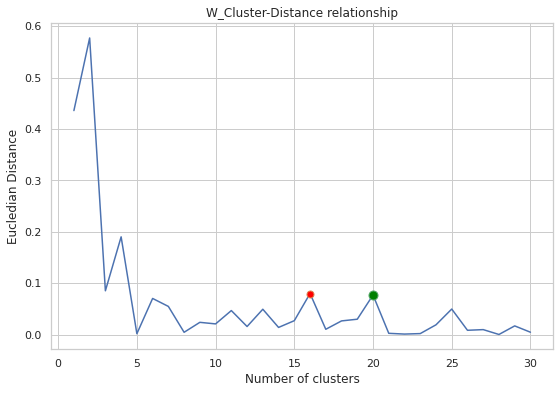

In [114]:
# Get plot of distances and their respective no. of clusters (i.e. indices+1)
plt.figure(figsize=(9,6))
sns.lineplot(x=range(1,len(jump)+1), y=jump, markers=True)
plt.xlabel('Number of clusters')
plt.ylabel('Eucledian Distance')
plt.title('W_Cluster-Distance relationship')

# Plot some considerable points
plt.plot(16,jump[16-1],marker="o", markerfacecolor="red",markersize=7)
plt.plot(20,jump[20-1],marker="o", markerfacecolor="green",markersize=9)

We may go for 20 clusters since the distance jump between 16 and 20 is not much, and 20 clusters will provide better separation than 16 clusters.

Let's check out silhouette scores and then decide the optimal number of clusters.


#### Silhouette Score for optimal clusters

In [82]:
def find_w_optimal_clusters(dataset_list, labels_list,color_list):
  for i in range(len(dataset_list)):
    data = dataset_list[i]
    label = labels_list[i]
    paint = color_list[i]

    print("***"*5,f"Working on {label}","***"*5)
    print(" ")
    # Choosing the max number of clusters based on the dimension of the data
    # If the data dimension is above 500, then max number of clusters will be 500 due to the system's limitation
    if len(data.columns)>500:
      params = (np.linspace(2,100,10)).astype(int)
    # If the data dimension is above 500, then max number of clusters will be 500 due to the system's limitation
    else:
      params = (np.linspace(2,len(data.columns),10)).astype(int)

    iters = params
    ss = []

    for k in iters:
      # Create model and get necessary attributes
      model = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward').fit(data)
      model_labels = model.labels_

      ss.append(silhouette_score(data, model_labels))

    plt.figure(figsize=(8,6))
    # Plot silhouette score plot
    sns.barplot(iters,ss,color=paint)
    plt.xlabel('Cluster Centers',fontsize=13)
    plt.ylabel('Silhouette score',fontsize=13)
    plt.title(f'Silhouette score plot for {label}',fontsize=18,color=paint)

    plt.show()
    # Print optimal number of clusters
    print(" ")
    best_cluster_centers = params[ss.index(max(ss))]
    print("---"*10)
    print(f"For dataset {label}, optimal number of clusters are {best_cluster_centers}")
    print("---"*10)
    print(" ")

*************** Working on description ***************
 


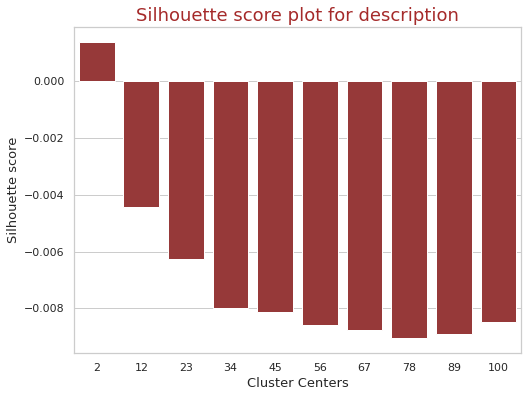

 
------------------------------
For dataset description, optimal number of clusters are 2
------------------------------
 
*************** Working on genres ***************
 


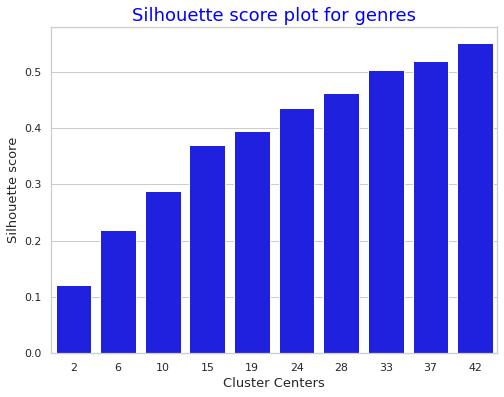

 
------------------------------
For dataset genres, optimal number of clusters are 42
------------------------------
 
*************** Working on country_rating_genres_type ***************
 


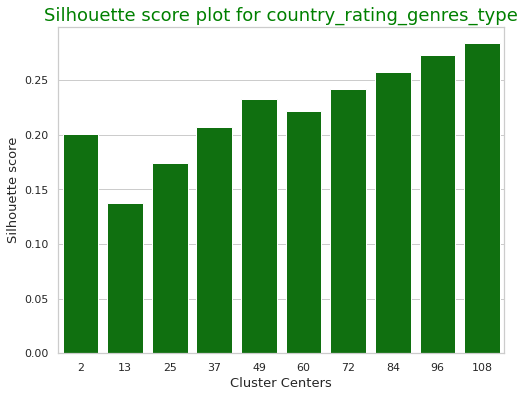

 
------------------------------
For dataset country_rating_genres_type, optimal number of clusters are 108
------------------------------
 


In [116]:
dataset_list = [d,genres,crgt]
labels_list = ['description','genres','country_rating_genres_type']
color_list = ['brown','blue','green']
# Get the silhouette score method rolling
find_w_optimal_clusters(dataset_list, labels_list,color_list)

####<u>Inference</u> : No suitable number of cluster value for description dataset so, we won't waste our time on training the model on description dataset.

For genres and crgt dataset optimal number of clusters are 42 and 108 these are same numbers as given by KMeans.

Let's train the model and visualize the clusters

###Training Hierarchical ward clustering model 

In [63]:
# Training the hierarchical clustering models based on 
# Fit genres data
w_clusters_genres = AgglomerativeClustering(n_clusters = 42, affinity = 'euclidean', linkage = 'ward').fit_predict(genres)
# Fit crgt data
w_clusters_crgt = AgglomerativeClustering(n_clusters = 108, affinity = 'euclidean', linkage = 'ward').fit_predict(crgt)

In [86]:
# Fit actors data
w_clusters_actors = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage = 'ward').fit_predict(actors)

#### Performance check [Model: ward clustering]

#####davies_bouldin_score
The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

In [64]:
# Davies bouldin score, closer to 0 means better partition
print(f'davies_bouldin_score for genres data : {davies_bouldin_score(genres, w_clusters_genres)}')

print(f'davies_bouldin_score for crgt data : {davies_bouldin_score(crgt, w_clusters_crgt)}')

davies_bouldin_score for genres data : 1.1059625032073515
davies_bouldin_score for crgt data : 1.756324535905783


In [65]:
# Silhouette score, closer to 1 means better partition
print(f'Silhouette_score for genres data : {silhouette_score(genres, w_clusters_genres)}')

print(f'Silhouette_score for crgt data : {silhouette_score(crgt, w_clusters_crgt)}')

Silhouette_score for genres data : 0.5516215466057381
Silhouette_score for crgt data : 0.2843811728870197


<u>Observation</u> : Silhouette score for Ward clustering on datasets genres and crgt are better than those of MiniBatchKMeans clustering.

####<u><b>Plot the clusters</u></b>

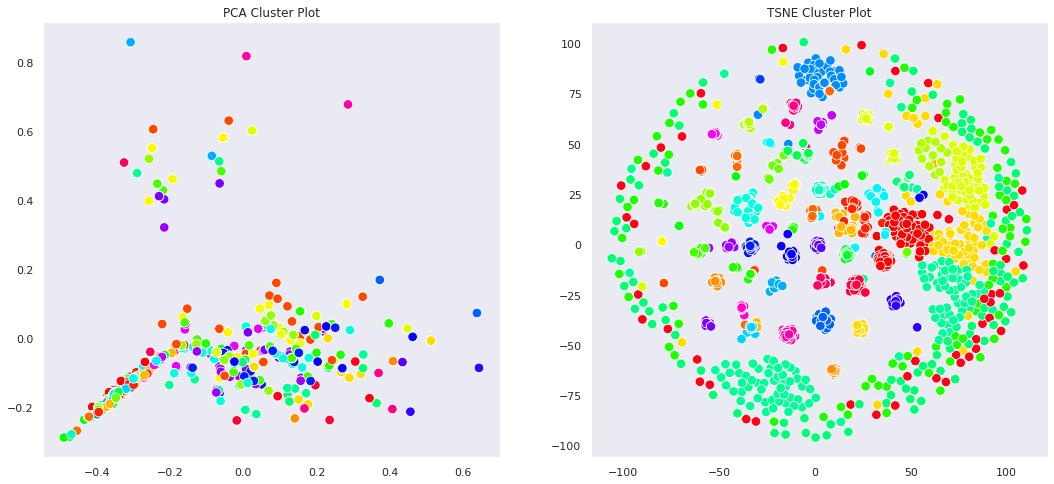

In [72]:
# Visualize the clusters in genres dataset
plot_tsne_pca(genres, w_clusters_genres)

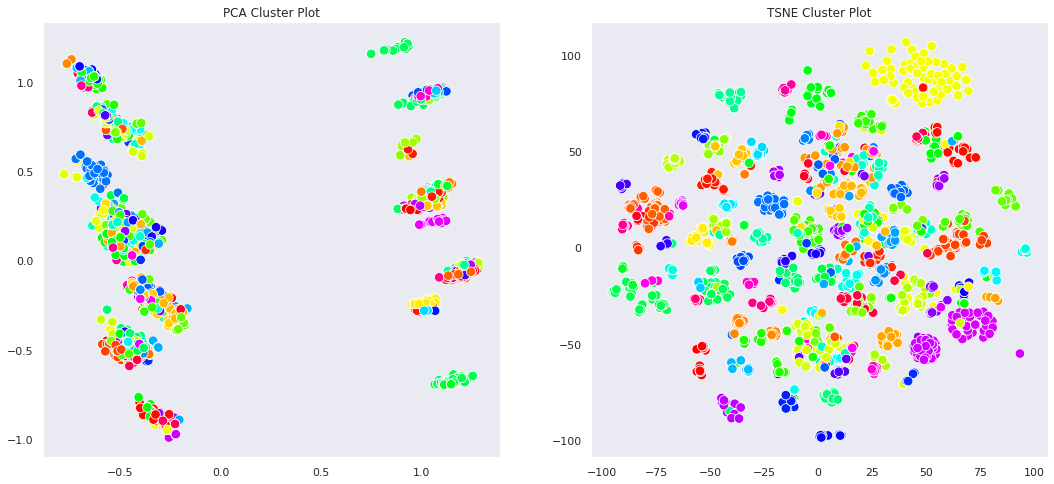

In [73]:
# Visualize the clusters in country_rating_genres_type dataset
plot_tsne_pca(crgt, w_clusters_crgt)

#### Inference : The cluster separation is slighly better than that of KMeans clustering for both genres and crgt data.

### Check out the results

The cluster size variation looks like... 
 


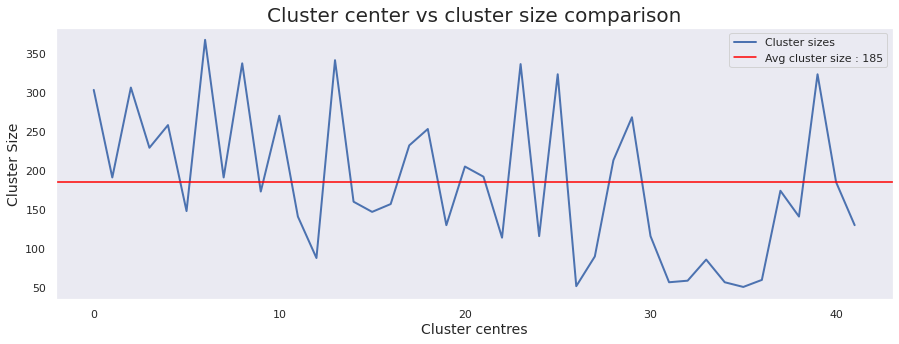

 
The keywords in the largest cluster are, 
lgbtqmovies,musicmusicals,realitytv,romantictvshows,sciencenaturetv,scififantasy,spanishlanguagetvshows,sportsmovies,standupcomedy,standupcomedytalkshows,teentvshows,thrillers,tvactionadventure,tvcomedies,tvdramas,tvhorror,tvmysteries,tvscififantasy,movies,tvshows,tvthrillers,kidstv,animefeatures,animeseries,britishtvshows,childrenfamilymovies,classicculttv,classicmovies,crimetvshows,koreantvshows,cultmovies,docuseries,faithspirituality,horrormovies,internationaltvshows,documentaries,comedies,actionadventure,romanticmovies,internationalmovies,dramas,independentmovies
 
The resultant dataframe of cluster info is... 
 


Top_keywords  Cluster_size  \
6   lgbtqmovies,musicmusicals,realitytv,romantictv...           367   
13  lgbtqmovies,musicmusicals,realitytv,romanticmo...           341   
8   lgbtqmovies,realitytv,romanticmovies,romantict...           337   
23  actionadventure,realitytv,romanticmovies,roman...           336   
39  actionadventure,musicmusicals,realitytv,romant...           323   
25  actionadventure,realitytv,romanticmovies,roman...           323   
2   lgbtqmovies,movies,realitytv,romantictvshows,s...           306   
0   actionadventure,movies,musicmusicals,romanticm...           303   
10  lgbtqmovies,musicmusicals,realitytv,romantictv...           270   
29  actionadventure,realitytv,romanticmovies,roman...           268   
4   actionadventure,realitytv,romanticmovies,roman...           258   
18  lgbtqmovies,musicmusicals,realitytv,romantictv...           253   
17  lgbtqmovies,musicmusicals,realitytv,romantictv...           232   
3   actionadventure,movies,musicmusicals,realitytv...           229   
28  actionadventure,musicmusicals,realitytv,romant...           213   
20  lgbtqmovies,movies,realitytv,romantictvshows,s...           205   
21  actionadventure,movies,musicmusicals,romanticm...           192   
7   lgbtqmovies,movies,realitytv,romantictvshows,s...           191   
1   actionadventure,thrillers,teentvshows,standupc...           191   
40  actionadventure,realitytv,romanticmovies,roman...           185   
37  actionadventure,realitytv,romanticmovies,roman...           174   
9   actionadventure,musicmusicals,realitytv,romant...           173   
14  actionadventure,musicmusicals,realitytv,romant...           160   
16  actionadventure,movies,musicmusicals,romanticm...           157   
5   actionadventure,thrillers,teentvshows,standupc...           148   
15  actionadventure,musicmusicals,realitytv,romant...           147   
11  actionadventure,musicmusicals,romanticmovies,s...           141   
38  actionadventure,realitytv,romanticmovies,roman...           141   
41  lgbtqmovies,realitytv,romanticmovies,romantict...           130   
19  actionadventure,musicmusicals,realitytv,romant...           130   
24  actionadventure,movies,musicmusicals,romanticm...           116   
30  actionadventure,realitytv,romanticmovies,roman...           116   
22  actionadventure,musicmusicals,realitytv,romant...           114   
27  lgbtqmovies,tvshows,movies,realitytv,romantict...            90   
12  actionadventure,movies,realitytv,romantictvsho...            88   
33  actionadventure,movies,musicmusicals,romanticm...            86   
36  actionadventure,thrillers,standupcomedytalksho...            60   
32  tvthrillers,spanishlanguagetvshows,sciencenatu...            59   
31  lgbtqmovies,movies,realitytv,romantictvshows,s...            57   
34  lgbtqmovies,movies,realitytv,romantictvshows,s...            57   
26  actionadventure,realitytv,romanticmovies,roman...            52   
35  actionadventure,musicmusicals,realitytv,romant...            51   

                                      Similar_content  
6   [​​Kuch Bheege Alfaaz, 18 Presents, 20th Centu...  
13  [1922, Oct-01, 22-Jul, 26 Years, 3 Deewarein, ...  
8   [​Goli Soda 2, 10,000 B.C., 14 Blades, 16 Bloc...  
23  [(T)ERROR, 100 Years: One Woman's Fight for Ju...  
39  [A Russell Peters Christmas, Adam Devine: Best...  
25  [7:19, ​Maj Rati ​​Keteki, ​Mayurakshi, Òlòtūr...  
2   [20 Feet From Stardom, 2015 Dream Concert, 7 D...  
0   [44 Cats, Abby Hatcher, Akbar Birbal, Alexa & ...  
10  [23:59, 122, 706, 1920, #Alive, Ég man þig, 13...  
29  [#Selfie, #Selfie 69, 10 jours en or, 2 States...  
4   [#realityhigh, ¡Ay, mi madre!, Çarsi Pazar, Ço...  
18  [A Babysitter's Guide to Monster Hunting, A Ch...  
17  [#Roxy, 10 Days in Sun City, 5 to 7, 50 First ...  
3   [แผนร้ายนายเจ้าเล่ห์, 100 Days My Prince, 45 r...  
28  [#FriendButMarried, #FriendButMarried 2, 1 Cha...  
20  [9, 3022, Æon Flux, 2036 Origin Unknown, 2307:...  
21  [100% Hotter, 21 Again, Africa,

In [70]:
# Get clusters info for genres dataset
get_cluster_info(genres, w_clusters_genres)

The cluster size variation looks like... 
 


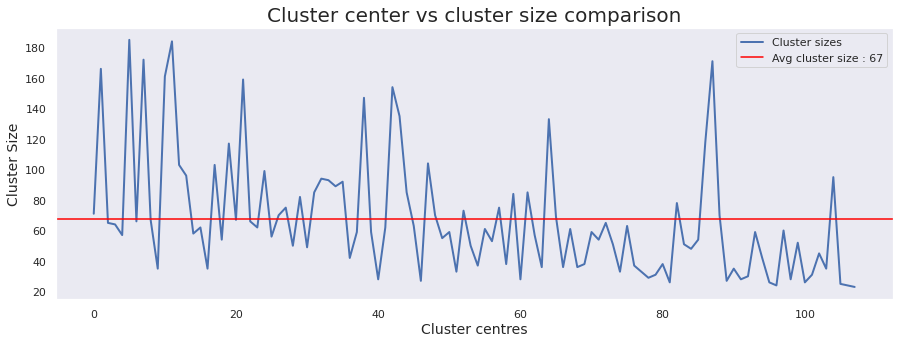

 
The keywords in the largest cluster are, 
argentina,britishtvshows,animeseries,animefeatures,ur,tvy7fv,tvy7,tvy,tvpg,classicculttv,tvma,tv14,pg,vietnam,uruguay,unitedkingdom,unitedarabemirates,turkey,thailand,tvg,taiwan,crimetvshows,internationaltvshows,tvthrillers,tvshows,tvscififantasy,tvmysteries,tvhorror,tvdramas,tvcomedies,tvactionadventure,docuseries,teentvshows,standupcomedy,spanishlanguagetvshows,sciencenaturetv,romantictvshows,realitytv,movies,koreantvshows,kidstv,standupcomedytalkshows,switzerland,nr,spain,sweden,indonesia,india,iceland,hongkong,germany,france,finland,egypt,israel,denmark,colombia,china,chile,canada,bulgaria,brazil,belgium,austria,australia,czechrepublic,italy,ireland,nigeria,southkorea,southafrica,singapore,saudiarabia,russia,romania,poland,philippines,peru,pakistan,norway,japan,newzealand,netherlands,tvshow,malaysia,kuwait,lebanon,mexico,internationalmovies,childrenfamilymovies,scififantasy,faithspirituality,lgbtqmovies,documentaries,classicmovies,musicmu

Top_keywords  Cluster_size  \
5    argentina,britishtvshows,animeseries,animefeat...           185   
11   argentina,classicculttv,childrenfamilymovies,b...           184   
7    argentina,childrenfamilymovies,britishtvshows,...           172   
87   argentina,horrormovies,faithspirituality,drama...           171   
1    argentina,classicmovies,classicculttv,children...           166   
..                                                 ...           ...   
100  argentina,comedies,classicmovies,classicculttv...            26   
105  argentina,cultmovies,crimetvshows,classicmovie...            25   
96   argentina,comedies,classicmovies,classicculttv...            24   
106  argentina,cultmovies,crimetvshows,comedies,cla...            24   
107  argentina,classicmovies,classicculttv,children...            23   

                                       Similar_content  
5    [21, 17 Again, 20 Feet From Stardom, 28 Days, ...  
11   [#Selfie, #Selfie 69, Ég man þig, 100 Meters, ...  
7    [3%, 46, 1983, Şubat, 20 Minutes, Agent, AMO, ...  
87   [Adam Devine: Best Time of Our Lives, ADAM SAN...  
1    [1922, 6 Balloons, 6 Years, A Fall from Grace,...  
..                                                 ...  
100  [Accidentally in Love, Ashes of Love, Chosen, ...  
105  [Òlòtūré, 4th Republic, A Trip to Jamaica, Chi...  
96   [A Boy Name Flora A, A Taiwanese Tale of Two C...  
106  [37 Seconds, Altered Carbon: Resleeved, Berser...  
107  [Aunty Donna's Big Ol' House of Fun, Aussie Go...  

[108 rows x 3 columns]

In [71]:
# Get clusters info for crgt dataset
get_cluster_info(crgt, w_clusters_crgt)

#### Inference: The cluster size variation plots are comparatively smoother in case of ward clustering than KMeans clustering

# <b><u>Similar content system</b></u>

## k_similar_content 
Using kmeans clustering alone

In [132]:
# Creating the soft recommendation dataset
df['cluster_d'] = clusters_d # Adding cluster numbers of similar content based on description alone to the df dataframe

df['cluster_genres'] = clusters_genres # Adding cluster numbers of similar content based on genres alone to the df dataframe

df_country_cleaned = df[df['country']!='no_country'] # Create a different dataset to store country related data
df_country_cleaned ['cluster_crgt'] = clusters_crgt # Adding cluster numbers of similar content based on country_rating_genre_type to the df_country_cleaned dataframe

df_for_rec = df.merge(df_country_cleaned, how='left',on=df.columns.tolist())
df_for_rec = df_for_rec.dropna()
df_for_rec['cluster_crgt'] = df_for_rec['cluster_crgt'].astype(int)

In [145]:
# Build a recommendation/ similar content function using the recommendation dataset
def k_similar_content():
  print(f'Available movies ...\n\n{df_for_rec["title"].tolist()}') # Print the dataset, so the users can check the dataset 
  while True :
    content_name = input("You are looking for similar contents with ") # Take the user input
    content_name = content_name.title() # Convert the name into title case
    print(" ")
    if content_name not in df_for_rec['title'].tolist():
      print('Sorry, this content is not available on Netflix') # ***If the inputted content is not present in the dataset, print this line***
    else:
      output = df_for_rec[(df_for_rec['title']!=content_name) & 
                (df_for_rec['cluster_d']==df_for_rec[df_for_rec['title']==content_name]['cluster_d'].to_list()[0]) & 
                (df_for_rec['cluster_crgt']==df_for_rec[df_for_rec['title']==content_name]['cluster_crgt'].to_list()[0])
                ][['title','cast','director','description','duration','release_year','listed_in']].sort_values('release_year',ascending=False)
      print("--"*10)
      print(f'Available recommendations are {output.shape[0]}') # Total number of similar content in the dataset
      print("--"*10)
      print(" ")
      print("Recommending top 10 content") 
      return output[['title','cast','director','description','duration']].set_index('title').iloc[:10,:] # Recommend the top 10 content

    choice = input("Try the keywords again, yes/no? : ") # In case the user input is invalid, ask user if they wants to try again with the keywords
    if choice.lower()=='yes': 
     continue
    else:
        break # If not 'yes' then break the loop

In [146]:
# Check for the quality of the results 
k_similar_content()

Available movies ...

['3%', '7:19', '23:59', '9', '21', '46', '122', '187', '706', '1920', '1922', '1983', '1994', '2,215', '3022', 'Oct-01', '22-Jul', '15-Aug', "'89", '\u200b\u200bKuch Bheege Alfaaz', '\u200bGoli Soda 2', '\u200bMaj Rati \u200b\u200bKeteki', '\u200bMayurakshi', '\u200bSAINT SEIYA: Knights of the Zodiac', '(T)ERROR', '(Un)Well', '#Alive', '#AnneFrank - Parallel Stories', '#blackAF', '#cats_the_mewvie', '#FriendButMarried', '#FriendButMarried 2', '#realityhigh', '#Roxy', '#Rucker50', '#Selfie', '#Selfie 69', '¡Ay, mi madre!', 'Çarsi Pazar', 'Ég man þig', 'Çok Filim Hareketler Bunlar', 'Òlòtūré', 'Æon Flux', 'Şubat', '1 Chance 2 Dance', '1 Mile to You', '10 Days in Sun City', '10 jours en or', '10,000 B.C.', '100 Days My Prince', '100 Days Of Solitude', '100 Humans', '100 Meters', '100 Things to do Before High School', "100 Years: One Woman's Fight for Justice", '100% Halal', '100% Hotter', '1000 Rupee Note', '12 ROUND GUN', '12 Years Promise', '13 Cameras', '13 Reason

cast  \
title                                                                                   
Class of '83                        Bobby_Deol, Bhupendra_Jadawat, Hitesh_Bhojraj,...   
Asura Guru                          Vikram_Prabhu, Subbaraju, Mahima_Nambiar, Yogi...   
Choked: Paisa Bolta Hai             Saiyami_Kher, Roshan_Mathew, Amruta_Subhash, U...   
706                                 Divya_Dutta, Atul_Kulkarni, Mohan_Agashe, Anup...   
Uriyadi 2                           Vijay_Kumar, Vismaya, Shankar_Thas, Abbas, Sud...   
Kolaiyuthir Kaalam                  Nayanthara, Bhoomika_Chawla, Prem_Kathir, Rohi...   
The Body                            Rishi_Kapoor, Emraan_Hashmi, Sobhita_Dhulipala...   
One Day: Justice Delivered          Anupam_Kher, Esha_Gupta, Kumud_Mishra, Kashyap...   
Bhai: Vyakti Ki Valli - Poorvardha  Sagar_Deshmukh, Vijay_Kenkre, Iravati_Harshe, ...   
Bypass Road                         Neil_Nitin_Mukesh, Adah_Sharma, Rajit_Kapoor, ...   

                                              director  \
title                                                    
Class of '83                            Atul_Sabharwal   
Asura Guru                                A._Raajdheep   
Choked: Paisa Bolta Hai                 Anurag_Kashyap   
706                                      Shravan_Kumar   
Uriyadi 2                                  Vijay_Kumar   
Kolaiyuthir Kaalam                       Chakri_Toleti   
The Body                                 Jeethu_Joseph   
One Day: Justice Delivered                 Ashok_Nanda   
Bhai: Vyakti Ki Valli - Poorvardha    Mahesh_Manjrekar   
Bypass Road                         Naman_Nitin_Mukesh   

                                                                          description  \
title                                                                                   
Class of '83                        Demoted to an academy job, a cop trains five f...   
Asura Guru                          For a tech-savvy thief, elaborate robberies an...   
Choked: Paisa Bolta Hai             A bank employee weighed down by her jobless hu...   
706                                 When a doctor goes missing, his psychiatrist w...   
Uriyadi 2                           When a chemical plant's poor conditions cause ...   
Kolaiyuthir Kaalam                  The speech-and-hearing-impaired heiress of a p...   
The Body                            Mind games and mystery abound as a detective i...   
One Day: Justice Delivered          A former judge in retirement finds and punishe...   
Bhai: Vyakti Ki Valli - Poorvardha  This first of a two-part biopic depicts the ea...   
Bypass Road                         On the night his ex-lover mysteriously dies, a...   

                                   duration  
title                                        
Class of '83                         98 min  
Asura Guru                          117 min  
Choked: Paisa Bolta Hai             114 min  
706                                 118 min  
Uriyadi 2                           116 min  
Kolaiyuthir Kaalam                  107 min  
The Body                            101 min  
One Day: Justice Delivered          120 min  
Bhai: Vyakti Ki Valli - Poorvardha  116 min  
Bypass Road                         135 min

####These are actually really good results.

Let's try with different content name

In [147]:
k_similar_content()

Available movies ...

['3%', '7:19', '23:59', '9', '21', '46', '122', '187', '706', '1920', '1922', '1983', '1994', '2,215', '3022', 'Oct-01', '22-Jul', '15-Aug', "'89", '\u200b\u200bKuch Bheege Alfaaz', '\u200bGoli Soda 2', '\u200bMaj Rati \u200b\u200bKeteki', '\u200bMayurakshi', '\u200bSAINT SEIYA: Knights of the Zodiac', '(T)ERROR', '(Un)Well', '#Alive', '#AnneFrank - Parallel Stories', '#blackAF', '#cats_the_mewvie', '#FriendButMarried', '#FriendButMarried 2', '#realityhigh', '#Roxy', '#Rucker50', '#Selfie', '#Selfie 69', '¡Ay, mi madre!', 'Çarsi Pazar', 'Ég man þig', 'Çok Filim Hareketler Bunlar', 'Òlòtūré', 'Æon Flux', 'Şubat', '1 Chance 2 Dance', '1 Mile to You', '10 Days in Sun City', '10 jours en or', '10,000 B.C.', '100 Days My Prince', '100 Days Of Solitude', '100 Humans', '100 Meters', '100 Things to do Before High School', "100 Years: One Woman's Fight for Justice", '100% Halal', '100% Hotter', '1000 Rupee Note', '12 ROUND GUN', '12 Years Promise', '13 Cameras', '13 Reason

cast  \
title                                                                    
Scream               Willa_Fitzgerald, Bex_Taylor-Klaus, John_Karna...   
Narcos               Wagner_Moura, Pedro_Pascal, Boyd_Holbrook, Dam...   
Outlander            Caitriona_Balfe, Sam_Heughan, Tobias_Menzies, ...   
From Dusk Till Dawn  D.J._Cotrona, Zane_Holtz, Eiza_Gonzalez, Jesse...   
Jack Taylor          Iain_Glen, Killian_Scott, Nora-Jane_Noone, Tar...   

                        director  \
title                              
Scream               no_director   
Narcos               no_director   
Outlander            no_director   
From Dusk Till Dawn  no_director   
Jack Taylor          Stuart_Orme   

                                                           description  \
title                                                                    
Scream               In this new TV series sequel to the classic ho...   
Narcos               The true story of Colombia's infamously violen...   
Outlander            This epic tale adapted from Diana Gabaldon's p...   
From Dusk Till Dawn  Bank-robbing brothers encounter vengeful lawme...   
Jack Taylor          Ken Bruen's bestselling crime novels leap to l...   

                      duration  
title                           
Scream               3 Seasons  
Narcos               3 Seasons  
Outlander            3 Seasons  
From Dusk Till Dawn  3 Seasons  
Jack Taylor           1 Season

## w_similar_content

In [127]:
# Creating the recommendation dataset
df['w_clusters_genres'] = w_clusters_genres # Adding cluster numbers of similar content based on description alone to the df dataframe

df_country_cleaned = df[df['country']!='no_country'] # Create a different dataset to store country related data
df_country_cleaned ['w_clusters_crgt'] = w_clusters_crgt # Adding cluster numbers of similar content based on country_rating_genre_type to the df_country_cleaned dataframe

all_content_df = df.merge(df_country_cleaned, how='left',on=df.columns.tolist())
all_content_df = all_content_df.dropna()
all_content_df['w_clusters_crgt'] = all_content_df['w_clusters_crgt'].astype(int)

In [148]:
# Build a recommendation/ similar content function using the recommendation dataset
def w_similar_content():
  print(f'Available movies ...\n\n{all_content_df["title"].tolist()}') # Print the dataset, so the users can check the dataset 
  while True :
    content_name = input("You are looking for similar contents with ") # Take the user input
    content_name = content_name.title() # Capitalize each word, using title case
    print(" ")
    if content_name not in all_content_df['title'].tolist():
      print('Sorry, this content is not available on Netflix') # ***If the inputted content is not present in the dataset, print this line***
    else:
      output = all_content_df[(all_content_df['title']!=content_name) & 
                (all_content_df['cluster_d']==all_content_df[all_content_df['title']==content_name]['cluster_d'].to_list()[0]) & 
                (all_content_df['w_clusters_crgt']==all_content_df[all_content_df['title']==content_name]['w_clusters_crgt'].to_list()[0])
                ][['title','cast','director','description','duration','release_year','listed_in']].sort_values('release_year',ascending=False)
      print("--"*10)
      print(f'Available recommendations are {output.shape[0]}') # Total number of similar content in the dataset
      print("--"*10)
      print(" ")
      if output.shape[0]>=10:
        print("Recommending top 10 content") 
      else:
        print(f"Recommending top {output.shape[0]} content")
      return output[['title','cast','director','description','duration']].set_index('title').iloc[:10,:] # Recommend the top 10 content

    choice = input("Try the keywords again, yes/no? : ") # In case the user input is invalid, ask user if they wants to try again with the keywords
    if choice.lower()=='yes': 
     continue
    else:
        break # If not 'yes' then break the loop

In [149]:
w_similar_content()

Available movies ...

['3%', '7:19', '23:59', '9', '21', '46', '122', '187', '706', '1920', '1922', '1983', '1994', '2,215', '3022', 'Oct-01', '22-Jul', '15-Aug', "'89", '\u200b\u200bKuch Bheege Alfaaz', '\u200bGoli Soda 2', '\u200bMaj Rati \u200b\u200bKeteki', '\u200bMayurakshi', '\u200bSAINT SEIYA: Knights of the Zodiac', '(T)ERROR', '(Un)Well', '#Alive', '#AnneFrank - Parallel Stories', '#blackAF', '#cats_the_mewvie', '#FriendButMarried', '#FriendButMarried 2', '#realityhigh', '#Roxy', '#Rucker50', '#Selfie', '#Selfie 69', '¡Ay, mi madre!', 'Çarsi Pazar', 'Ég man þig', 'Çok Filim Hareketler Bunlar', 'Òlòtūré', 'Æon Flux', 'Şubat', '1 Chance 2 Dance', '1 Mile to You', '10 Days in Sun City', '10 jours en or', '10,000 B.C.', '100 Days My Prince', '100 Days Of Solitude', '100 Humans', '100 Meters', '100 Things to do Before High School', "100 Years: One Woman's Fight for Justice", '100% Halal', '100% Hotter', '1000 Rupee Note', '12 ROUND GUN', '12 Years Promise', '13 Cameras', '13 Reason

cast  \
title                                                                                     
Ethirmarai                                                           Ramanathan, Rakesh   
Sarvam Thaala Mayam (Telugu Version)  G.V._Prakash_Kumar, Nedumudi_Venu, Aparna_Bala...   
Lucknow Central                       Farhan_Akhtar, Diana_Penty, Ronit_Roy, Gippy_G...   
Secret Superstar                      Zaira_Wasim, Meher_Vij, Raj_Arjun, Aamir_Khan,...   
Happy Go Lucky                        Amrinder_Gill, Harish_Verma, Sumeet_Sandhu, Gu...   
Romeo Ranjha                          Jazzy_B, Garry_Sandhu, Monica_Bedi, Parul_Gula...   
Settai                                Arya, Anjali, Hansika_Motwani, Santhanam, Prem...   
Satyagraha                            Kareena_Kapoor, Amitabh_Bachchan, Ajay_Devgn, ...   
Vettai                                Arya, Madhavan, Sameera_Reddy, Amala_Paul, Nas...   
Kalakalappu                           Vimal, Anjali, Shiva, Oviya, Santhanam, John_V...   

                                                   director  \
title                                                         
Ethirmarai                                      no_director   
Sarvam Thaala Mayam (Telugu Version)            Rajiv_Menon   
Lucknow Central                               Ranjit_Tiwari   
Secret Superstar                             Advait_Chandan   
Happy Go Lucky                        Amarpreet_G_S_Chabbra   
Romeo Ranjha                                 Navaniat_Singh   
Settai                                            R._Kannan   
Satyagraha                                      Prakash_Jha   
Vettai                                        N._Linguswamy   
Kalakalappu                                       Sundar_C.   

                                                                            description  \
title                                                                                     
Ethirmarai                            While investigating a brutal string of deaths,...   
Sarvam Thaala Mayam (Telugu Version)  An aspiring musician battles age-old caste div...   
Lucknow Central                       After being arrested for a crime he didn't com...   
Secret Superstar                      A talented teenage singer-songwriter living am...   
Happy Go Lucky                        Three sisters seem to be ideal brides for thre...   
Romeo Ranjha                          Two common boys travel from India to Thailand ...   
Settai                                Asked to deliver a package for a friend, Madhu...   
Satyagraha                            In this Bollywood drama, a corporate go-getter...   
Vettai                                This powerful Tamil action film follows the sh...   
Kalakalappu                           Cheenu dreams of resurrecting the restaurant h...   

                                     duration  
title                                          
Ethirmarai                             91 min  
Sarvam Thaala Mayam (Telugu Version)  131 min  
Lucknow Central                       144 min  
Secret Superstar                      150 min  
Happy Go Lucky                        129 min  
Romeo Ranjha                          122 min  
Settai                                123 min  
Satyagraha                            146 min  
Vettai                                156 min  
Kalakalappu                           154 min

In [150]:
w_similar_content()

Available movies ...

['3%', '7:19', '23:59', '9', '21', '46', '122', '187', '706', '1920', '1922', '1983', '1994', '2,215', '3022', 'Oct-01', '22-Jul', '15-Aug', "'89", '\u200b\u200bKuch Bheege Alfaaz', '\u200bGoli Soda 2', '\u200bMaj Rati \u200b\u200bKeteki', '\u200bMayurakshi', '\u200bSAINT SEIYA: Knights of the Zodiac', '(T)ERROR', '(Un)Well', '#Alive', '#AnneFrank - Parallel Stories', '#blackAF', '#cats_the_mewvie', '#FriendButMarried', '#FriendButMarried 2', '#realityhigh', '#Roxy', '#Rucker50', '#Selfie', '#Selfie 69', '¡Ay, mi madre!', 'Çarsi Pazar', 'Ég man þig', 'Çok Filim Hareketler Bunlar', 'Òlòtūré', 'Æon Flux', 'Şubat', '1 Chance 2 Dance', '1 Mile to You', '10 Days in Sun City', '10 jours en or', '10,000 B.C.', '100 Days My Prince', '100 Days Of Solitude', '100 Humans', '100 Meters', '100 Things to do Before High School', "100 Years: One Woman's Fight for Justice", '100% Halal', '100% Hotter', '1000 Rupee Note', '12 ROUND GUN', '12 Years Promise', '13 Cameras', '13 Reason

cast  \
title                                                                        
Grace and Frankie        Jane_Fonda, Lily_Tomlin, Martin_Sheen, Sam_Wat...   
Orange Is the New Black  Taylor_Schilling, Kate_Mulgrew, Laura_Prepon, ...   
Scream                   Willa_Fitzgerald, Bex_Taylor-Klaus, John_Karna...   
Shameless (U.S.)         William_H._Macy, Emmy_Rossum, Justin_Chatwin, ...   
She's Gotta Have It      DeWanda_Wise, Cleo_Anthony, Lyriq_Bent, Anthon...   
Narcos                   Wagner_Moura, Pedro_Pascal, Boyd_Holbrook, Dam...   
Outlander                Caitriona_Balfe, Sam_Heughan, Tobias_Menzies, ...   
From Dusk Till Dawn      D.J._Cotrona, Zane_Holtz, Eiza_Gonzalez, Jesse...   
Jack Taylor              Iain_Glen, Killian_Scott, Nora-Jane_Noone, Tar...   

                            director  \
title                                  
Grace and Frankie        no_director   
Orange Is the New Black  no_director   
Scream                   no_director   
Shameless (U.S.)         no_director   
She's Gotta Have It      no_director   
Narcos                   no_director   
Outlander                no_director   
From Dusk Till Dawn      no_director   
Jack Taylor              Stuart_Orme   

                                                               description  \
title                                                                        
Grace and Frankie        They’re not friends, but when their husbands l...   
Orange Is the New Black  A privileged New Yorker ends up in a women's p...   
Scream                   In this new TV series sequel to the classic ho...   
Shameless (U.S.)         This dramedy based on a British series centers...   
She's Gotta Have It      Nola Darling struggles to stay true to herself...   
Narcos                   The true story of Colombia's infamously violen...   
Outlander                This epic tale adapted from Diana Gabaldon's p...   
From Dusk Till Dawn      Bank-robbing brothers encounter vengeful lawme...   
Jack Taylor              Ken Bruen's bestselling crime novels leap to l...   

                           duration  
title                                
Grace and Frankie         6 Seasons  
Orange Is the New Black   7 Seasons  
Scream                    3 Seasons  
Shameless (U.S.)         10 Seasons  
She's Gotta Have It       2 Seasons  
Narcos                    3 Seasons  
Outlander                 3 Seasons  
From Dusk Till Dawn       3 Seasons  
Jack Taylor                1 Season

## A basic Recommendation system based on clusters

In [152]:
# Build a recommendation/ similar content function using the recommendation dataset
def recommend_content(choice):
  print(f'Available movies ...\n\n{all_content_df["title"].tolist()}') # Print the dataset, so the users can check the dataset 
  while True :
    content_name = input("You are looking for similar contents with ") # Take the user input
    content_name = content_name.title() # Capitalize each word, using title case
    print(" ")
    if content_name not in all_content_df['title'].tolist():
      print('Sorry, this content is not available on Netflix') # ***If the inputted content is not present in the dataset, print this line***
    else:
      # Results of kmeans clustering
      outputk = df_for_rec[(df_for_rec['title']!=content_name) & 
                (df_for_rec['cluster_d']==df_for_rec[df_for_rec['title']==content_name]['cluster_d'].to_list()[0]) & 
                (df_for_rec['cluster_crgt']==df_for_rec[df_for_rec['title']==content_name]['cluster_crgt'].to_list()[0])
                ][['title','cast','director','description','duration','release_year','listed_in']].sort_values('release_year',ascending=False)

      # Results of kmeans and ward clustering
      outputw = all_content_df[(all_content_df['title']!=content_name) & 
                (all_content_df['cluster_d']==all_content_df[all_content_df['title']==content_name]['cluster_d'].to_list()[0]) & 
                (all_content_df['w_clusters_crgt']==all_content_df[all_content_df['title']==content_name]['w_clusters_crgt'].to_list()[0])
                ][['title','cast','director','description','duration','release_year','listed_in']].sort_values('release_year',ascending=False)

      if outputk.shape[0] > outputw.shape[0]:
        soft_results = outputk.copy()
        hard_results = outputw.copy()
      else:
        hard_results = outputk.copy()
        soft_results = outputw.copy()

      print("--"*10)
      if choice.lower() =='hard':
        print(f'Number of available hard recommendations are {hard_results.shape[0]}') # Total number of similar content in the hard_results dataset
        print("--"*10)
        print(" ")
        if hard_results.shape[0]>=10:
          print("Recommending top 10 content") 
        else:
          print(f"Recommending top {hard_results.shape[0]} content")
        return hard_results[['title','cast','director','description','duration']].set_index('title').iloc[:10,:] # Recommend the top 10 content

      elif choice.lower() =='soft':
        print(f'Number of available soft recommendations are {soft_results.shape[0]}') # Total number of similar content in the soft_results dataset
        print("--"*10)
        print(" ")
        if soft_results.shape[0]>=10:
          print("Recommending top 10 content") 
        else:
          print(f"Recommending top {soft_results.shape[0]} content")
        return soft_results[['title','cast','director','description','duration']].set_index('title').iloc[:10,:] # Recommend the top 10 content

    choice = input("Try the keywords again, yes/no? : ") # In case the user input is invalid, ask user if they wants to try again with the keywords
    if choice.lower()=='yes': 
     continue
    else:
        break # If not 'yes' then break the loop

In [153]:
# Try the soft recommendation
recommend_content('soft')

Available movies ...

['3%', '7:19', '23:59', '9', '21', '46', '122', '187', '706', '1920', '1922', '1983', '1994', '2,215', '3022', 'Oct-01', '22-Jul', '15-Aug', "'89", '\u200b\u200bKuch Bheege Alfaaz', '\u200bGoli Soda 2', '\u200bMaj Rati \u200b\u200bKeteki', '\u200bMayurakshi', '\u200bSAINT SEIYA: Knights of the Zodiac', '(T)ERROR', '(Un)Well', '#Alive', '#AnneFrank - Parallel Stories', '#blackAF', '#cats_the_mewvie', '#FriendButMarried', '#FriendButMarried 2', '#realityhigh', '#Roxy', '#Rucker50', '#Selfie', '#Selfie 69', '¡Ay, mi madre!', 'Çarsi Pazar', 'Ég man þig', 'Çok Filim Hareketler Bunlar', 'Òlòtūré', 'Æon Flux', 'Şubat', '1 Chance 2 Dance', '1 Mile to You', '10 Days in Sun City', '10 jours en or', '10,000 B.C.', '100 Days My Prince', '100 Days Of Solitude', '100 Humans', '100 Meters', '100 Things to do Before High School', "100 Years: One Woman's Fight for Justice", '100% Halal', '100% Hotter', '1000 Rupee Note', '12 ROUND GUN', '12 Years Promise', '13 Cameras', '13 Reason

cast  \
title                                                                                   
Class of '83                        Bobby_Deol, Bhupendra_Jadawat, Hitesh_Bhojraj,...   
Asura Guru                          Vikram_Prabhu, Subbaraju, Mahima_Nambiar, Yogi...   
Choked: Paisa Bolta Hai             Saiyami_Kher, Roshan_Mathew, Amruta_Subhash, U...   
706                                 Divya_Dutta, Atul_Kulkarni, Mohan_Agashe, Anup...   
Uriyadi 2                           Vijay_Kumar, Vismaya, Shankar_Thas, Abbas, Sud...   
Kolaiyuthir Kaalam                  Nayanthara, Bhoomika_Chawla, Prem_Kathir, Rohi...   
The Body                            Rishi_Kapoor, Emraan_Hashmi, Sobhita_Dhulipala...   
One Day: Justice Delivered          Anupam_Kher, Esha_Gupta, Kumud_Mishra, Kashyap...   
Bhai: Vyakti Ki Valli - Poorvardha  Sagar_Deshmukh, Vijay_Kenkre, Iravati_Harshe, ...   
Bypass Road                         Neil_Nitin_Mukesh, Adah_Sharma, Rajit_Kapoor, ...   

                                              director  \
title                                                    
Class of '83                            Atul_Sabharwal   
Asura Guru                                A._Raajdheep   
Choked: Paisa Bolta Hai                 Anurag_Kashyap   
706                                      Shravan_Kumar   
Uriyadi 2                                  Vijay_Kumar   
Kolaiyuthir Kaalam                       Chakri_Toleti   
The Body                                 Jeethu_Joseph   
One Day: Justice Delivered                 Ashok_Nanda   
Bhai: Vyakti Ki Valli - Poorvardha    Mahesh_Manjrekar   
Bypass Road                         Naman_Nitin_Mukesh   

                                                                          description  \
title                                                                                   
Class of '83                        Demoted to an academy job, a cop trains five f...   
Asura Guru                          For a tech-savvy thief, elaborate robberies an...   
Choked: Paisa Bolta Hai             A bank employee weighed down by her jobless hu...   
706                                 When a doctor goes missing, his psychiatrist w...   
Uriyadi 2                           When a chemical plant's poor conditions cause ...   
Kolaiyuthir Kaalam                  The speech-and-hearing-impaired heiress of a p...   
The Body                            Mind games and mystery abound as a detective i...   
One Day: Justice Delivered          A former judge in retirement finds and punishe...   
Bhai: Vyakti Ki Valli - Poorvardha  This first of a two-part biopic depicts the ea...   
Bypass Road                         On the night his ex-lover mysteriously dies, a...   

                                   duration  
title                                        
Class of '83                         98 min  
Asura Guru                          117 min  
Choked: Paisa Bolta Hai             114 min  
706                                 118 min  
Uriyadi 2                           116 min  
Kolaiyuthir Kaalam                  107 min  
The Body                            101 min  
One Day: Justice Delivered          120 min  
Bhai: Vyakti Ki Valli - Poorvardha  116 min  
Bypass Road                         135 min

In [154]:
# Try the hard recommendation
recommend_content('hard')

Available movies ...

['3%', '7:19', '23:59', '9', '21', '46', '122', '187', '706', '1920', '1922', '1983', '1994', '2,215', '3022', 'Oct-01', '22-Jul', '15-Aug', "'89", '\u200b\u200bKuch Bheege Alfaaz', '\u200bGoli Soda 2', '\u200bMaj Rati \u200b\u200bKeteki', '\u200bMayurakshi', '\u200bSAINT SEIYA: Knights of the Zodiac', '(T)ERROR', '(Un)Well', '#Alive', '#AnneFrank - Parallel Stories', '#blackAF', '#cats_the_mewvie', '#FriendButMarried', '#FriendButMarried 2', '#realityhigh', '#Roxy', '#Rucker50', '#Selfie', '#Selfie 69', '¡Ay, mi madre!', 'Çarsi Pazar', 'Ég man þig', 'Çok Filim Hareketler Bunlar', 'Òlòtūré', 'Æon Flux', 'Şubat', '1 Chance 2 Dance', '1 Mile to You', '10 Days in Sun City', '10 jours en or', '10,000 B.C.', '100 Days My Prince', '100 Days Of Solitude', '100 Humans', '100 Meters', '100 Things to do Before High School', "100 Years: One Woman's Fight for Justice", '100% Halal', '100% Hotter', '1000 Rupee Note', '12 ROUND GUN', '12 Years Promise', '13 Cameras', '13 Reason

cast  \
title                                                                                     
Ethirmarai                                                           Ramanathan, Rakesh   
Sarvam Thaala Mayam (Telugu Version)  G.V._Prakash_Kumar, Nedumudi_Venu, Aparna_Bala...   
Lucknow Central                       Farhan_Akhtar, Diana_Penty, Ronit_Roy, Gippy_G...   
Secret Superstar                      Zaira_Wasim, Meher_Vij, Raj_Arjun, Aamir_Khan,...   
Happy Go Lucky                        Amrinder_Gill, Harish_Verma, Sumeet_Sandhu, Gu...   
Romeo Ranjha                          Jazzy_B, Garry_Sandhu, Monica_Bedi, Parul_Gula...   
Settai                                Arya, Anjali, Hansika_Motwani, Santhanam, Prem...   
Satyagraha                            Kareena_Kapoor, Amitabh_Bachchan, Ajay_Devgn, ...   
Vettai                                Arya, Madhavan, Sameera_Reddy, Amala_Paul, Nas...   
Kalakalappu                           Vimal, Anjali, Shiva, Oviya, Santhanam, John_V...   

                                                   director  \
title                                                         
Ethirmarai                                      no_director   
Sarvam Thaala Mayam (Telugu Version)            Rajiv_Menon   
Lucknow Central                               Ranjit_Tiwari   
Secret Superstar                             Advait_Chandan   
Happy Go Lucky                        Amarpreet_G_S_Chabbra   
Romeo Ranjha                                 Navaniat_Singh   
Settai                                            R._Kannan   
Satyagraha                                      Prakash_Jha   
Vettai                                        N._Linguswamy   
Kalakalappu                                       Sundar_C.   

                                                                            description  \
title                                                                                     
Ethirmarai                            While investigating a brutal string of deaths,...   
Sarvam Thaala Mayam (Telugu Version)  An aspiring musician battles age-old caste div...   
Lucknow Central                       After being arrested for a crime he didn't com...   
Secret Superstar                      A talented teenage singer-songwriter living am...   
Happy Go Lucky                        Three sisters seem to be ideal brides for thre...   
Romeo Ranjha                          Two common boys travel from India to Thailand ...   
Settai                                Asked to deliver a package for a friend, Madhu...   
Satyagraha                            In this Bollywood drama, a corporate go-getter...   
Vettai                                This powerful Tamil action film follows the sh...   
Kalakalappu                           Cheenu dreams of resurrecting the restaurant h...   

                                     duration  
title                                          
Ethirmarai                             91 min  
Sarvam Thaala Mayam (Telugu Version)  131 min  
Lucknow Central                       144 min  
Secret Superstar                      150 min  
Happy Go Lucky                        129 min  
Romeo Ranjha                          122 min  
Settai                                123 min  
Satyagraha                            146 min  
Vettai                                156 min  
Kalakalappu                           154 min

# <b><u>Conclusions</b></u>
## Insights from EDA
1. Movies and TV Shows on Netflix are in ratio 7/3. And TV Shows have long way to catch upto the number of Movies.

2. From past five years, Netflix has shifted its focus towards TV shows. Number of movies added to Netflix reduced by 45% while number of TV Shows added increased by 70%.

3. Most content on Netflix is from United States followed by India and United Kingdom. Netflix has a little over 90% of its total Content from 12 ountries, countries are namely, 'United_States', 'India', 'United_Kingdom', 'Canada', 'France', 'Japan', 'Spain', 'South_Korea', 'Germany', 'Mexico', 'China' and 'Australia'. 

4. Netflix has a lot of Japanese and South Korean TV Shows than the countries' movies and opposite in case of India.

5. Jan Suter is the most featured director. Raul Campos and Jan Suter together directed 18 movies. We can observe some other great names such as Jay Chapman, Martin Scorsese and Steven Spielberg in top 20 directors list.

6. Anupam Kher is the most featured actor, who featured in 42 movies. Out of top 10 actors, 8 are Indians. It shows the impact of Indian actors on the World television industry. Some great names like Amitabh Bachchan, Shahrukh Khan, Akshay Kumar and Paresh Rawal are in top 10 active actors.

7. International movies is the top genre followed by Dramas and Comedies.

8. Most movies are of length ~90 mins while most TV Shows have only one season.

9. Most content o Netflix is rated for mature audience only

10. Most content has description length of ~140 words.

11. Life, young, new, family and man are the most occuring words from the complete vocabulary of description.

## Insights from Clustering 
####a. Clustering on description column alone (dataset name : d)
*  We found 28 clusters using MiniBatchKMeans clustering with the silhouette score of 0.00912. The average cluster size is 277, while the largest cluster has 2751 items. The top keywords in the largest cluster are, evil,past,personal,gets,son,film,boy,stories,friend,hes,wife,save,police,detective,tries,crime,years,death,time,father,group,finds,woman,home,help,murder,young,life.

*  Ward clustering was unable to find optimal number clusters.

####b. Clustering on listed_in (referred as genres) column alone (dataset name : genres)
*  We found 42 clusters using MiniBatchKMeans clustering with the silhouette score of 0.54572. The average cluster size is 185, while the largest cluster has 521 items. 

* We found same number of optimal clusters with same average size using Ward clustering but with the improved silhouette score of 0.55162. The largest cluster has 367 items 

####c. Clustering on lead_country, rating, listed_in and type columns (dataset name : crgt)
*  We found 108 clusters using MiniBatchKMeans clustering with the silhouette score of 0.26778. The average cluster size is 67, while the largest cluster has 205 items. 
* We found same number of optimal clusters with same average size using Ward clustering but with the improved silhouette score of 0.28438. The largest cluster has 185 items 

d. The MiniBatchKMeans is much faster than the ward clustering and it gave decent results on all the datasets. The ward clustering gave slightly better results in terms of smoother cluster size and better cluster separation on genres and crgt dataset.

## similar_content system (a basic recommender system)
* Using the results of both MiniBatchKMeans and Ward clustering, we built a similar content system that can be used as a base for a recommender system. 
* Currently, it stands as a basic recommender system 
* The similar system recommends top 10 similar content based on description, lead_country, rating, genres, type and release year columns. 
* You just gotta enter a movie of your choice from the database and it will recommend top 10 similar content. 
* The system is pretty decent, so do check it out 🥲. 

If you have some +ve ideas to improve this project then please comment them out in the comment section...
